# Characterize mut plots

## Setup / load data

In [2]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from seq_tools import structure
from dreem_tools.plotting import *

# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 16
# to fight the theme
plt.rcParams["figure.facecolor"] = "white"

In [3]:
df = pd.read_json("../classified_muts_w_reactivity.json")
df_normed = pd.read_json("../classified_muts_w_reactivity_normed.json")

## custom functions

In [4]:
def get_percent_from_avg(df):
    data = []
    for i, row in df.iterrows():
        for j, d in enumerate(row["data"]):
            data.append([j, d])
    df_pos = pd.DataFrame(data, columns=["position", "data"])
    for pos, g in df_pos.groupby("position"):
        avg = g['data'].mean()
        diff = abs(g['data'] - avg) / g['data']
        print(sum(diff) / len(g) * 100) 
    

In [5]:
def plot_boxplots(df, **kwargs):
    """
    Plot a boxplot for each sequence in the dataframe. For each column `data`
    which is a list. Split into element into a new column and label by the
    sequence and structure columns which are of the same length as the data
    :param df:
    :param kwargs:
    :return:
    """
    data = []
    row = df.iloc[0]
    for i, row in df.iterrows():
        for j, d in enumerate(row["data"]):
            data.append([j, d])
    df = pd.DataFrame(data, columns=["position", "data"])
    ax = sns.boxplot(
        x="position",
        y="data",
        palette=colors_for_sequence(row["sequence"]),
        data=df,
        **kwargs,
    )
    sns.stripplot(x="position", y="data", data=df, color="black", ax=ax)
    if df["data"].max() < 0.05:
        ax.set_ylim([0, 0.05])
    elif df["data"].max() < 0.10:
        ax.set_ylim([0, 0.10])
    elif df["data"].max() < 0.15:
        ax.set_ylim([0, 0.15])
    else:
        ax.set_ylim([0, 0.20])
    ax.set_ylim([0, 0.10])
    ax.set_ylabel("reactivity (a.u.)")
    ax.set_xticks(range(0, len(row["sequence"])))
    ax.set_xticklabels(
        [f"{s}\n{nt}" for s, nt in zip(row["sequence"], row["structure"])]
    )
    return ax

In [6]:
def plot_tlr_res_against_mg2(df, bounds=[3, 10]):
    fig, ax = plt.subplots()
    pal = sns.color_palette("tab10", 11)[::-1]
    colors = pal
    for i in range(bounds[0], bounds[1]):
        seq =  df.iloc[0]["aligned_seq"][i-1]
        # not DMS active
        if seq == 'U' or seq =='G':
            continue
        ax.plot(df["mg_conc"], df[f"data_{i}"], lw=2, marker='o', markersize=7, color=colors[i], label=str(i) + " " + seq)
    ax.legend()
    ax.set_xlabel("mg_conc")
    ax.set_ylabel("normalized_reactivity")
    
# TODO take any residue plot against mg2 using data index?
# TODO may just want to classify the otehr functions
def plot_res_against_mg2(df):
    pass

## plotting

In [7]:
q1 = df['rna_name'].str.startswith('mtt6_mutations_set_1_50mM')
q2 = ~(df['mg_conc'] == 5.0) # figure out why this data is messed up??
q3 = df['name'] == "CAUGG_CCUAAA"

In [8]:
list(df[q1]["rna_name"].unique())

['mtt6_mutations_set_1_50mM-NaC_5-mM-Mg2+',
 'mtt6_mutations_set_1_50mM_NaC_40_mM_Mg2+',
 'mtt6_mutations_set_1_50mM_NaC_20_mM_Mg2+',
 'mtt6_mutations_set_1_50mM_NaC_15_mM_Mg2+',
 'mtt6_mutations_set_1_50mM_NaC_10_mM_Mg2+',
 'mtt6_mutations_set_1_50mM_NaC_7.5_mM_Mg2+',
 'mtt6_mutations_set_1_50mM_NaC_6.5_mM_Mg2+',
 'mtt6_mutations_set_1_50mM_NaC_5_mM_Mg2+',
 'mtt6_mutations_set_1_50mM_NaC_3.5_mM_Mg2+',
 'mtt6_mutations_set_1_50mM_NaC_2.5_mM_Mg2+',
 'mtt6_mutations_set_1_50mM_NaC_1.5_mM_Mg2+',
 'mtt6_mutations_set_1_50mM_NaC_1_mM_Mg2+',
 'mtt6_mutations_set_1_50mM_NaC_0.75_mM_Mg2+',
 'mtt6_mutations_set_1_50mM_NaC_0.5_mM_Mg2+',
 'mtt6_mutations_set_1_50mM_NaC_0.25_mM_Mg2+',
 'mtt6_mutations_set_1_50mM_NaC_0.1_mM_Mg2+',
 'mtt6_mutations_set_1_50mM_NaC_0_mM_Mg2+']

In [9]:
df_sub = df[q1 & q2 & q3]

In [10]:
df_sub["mg_conc"]

313    40.00
314    20.00
315    15.00
316    10.00
317     7.50
318     6.50
320     3.50
321     2.50
322     1.50
323     1.00
324     0.75
325     0.50
326     0.25
327     0.10
328     0.00
Name: mg_conc, dtype: float64

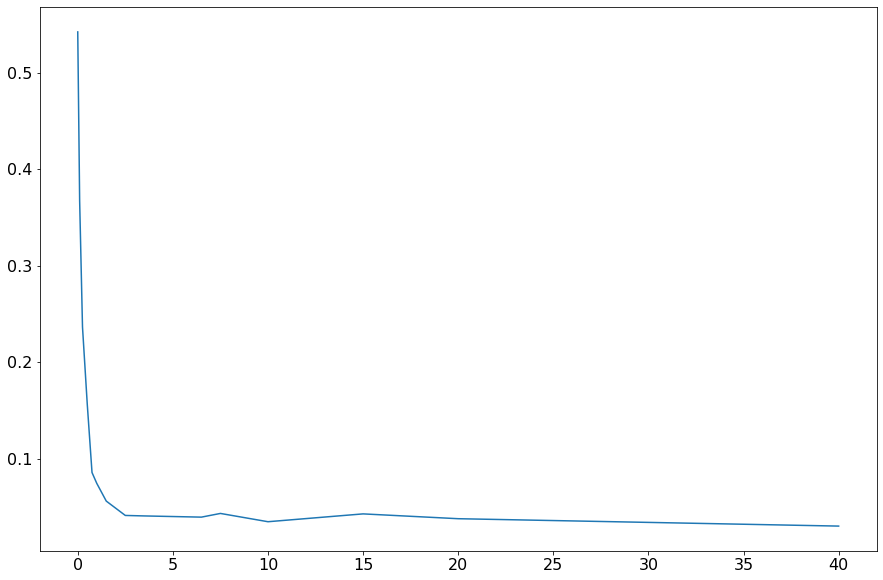

In [11]:
plt.plot(df_sub["mg_conc"], df_sub["gaaa_avg"] / df_sub["ref_hp_as"])

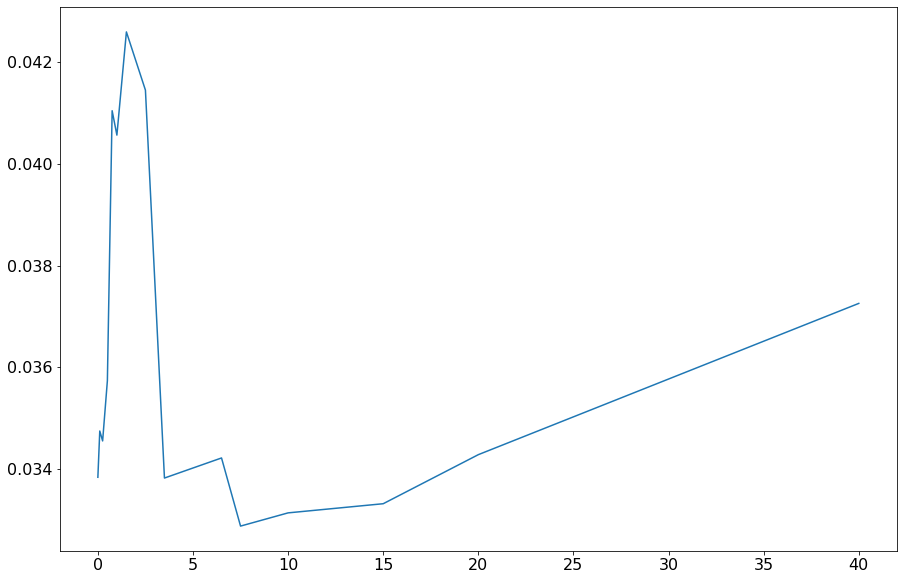

In [12]:
plt.plot(df_sub["mg_conc"], df_sub["ref_hp_as"])

### ploting residue reactivity vs mg2+

#### CAUGG_CCUAAA

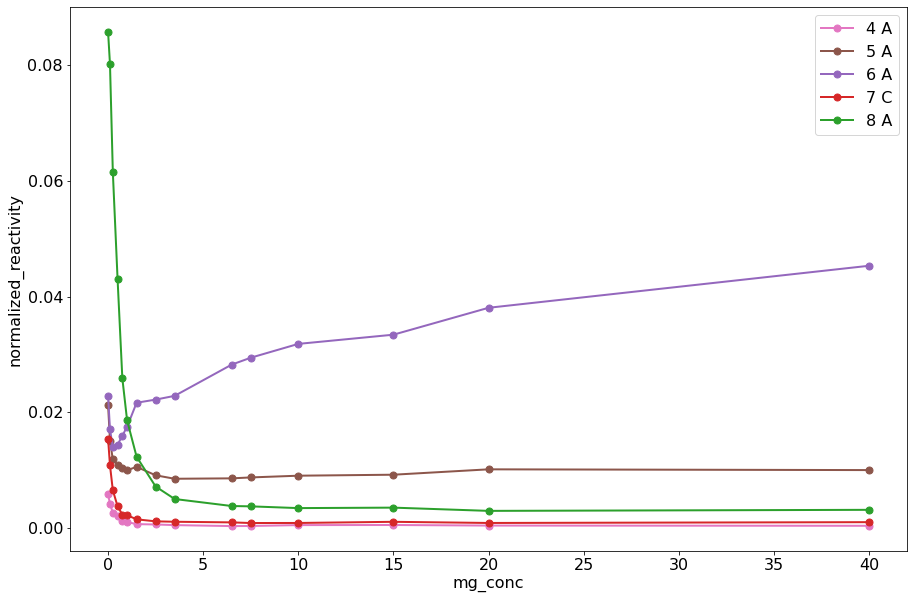

In [13]:
q3 = df["name"] == "CAUGG_CCUAAA"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)

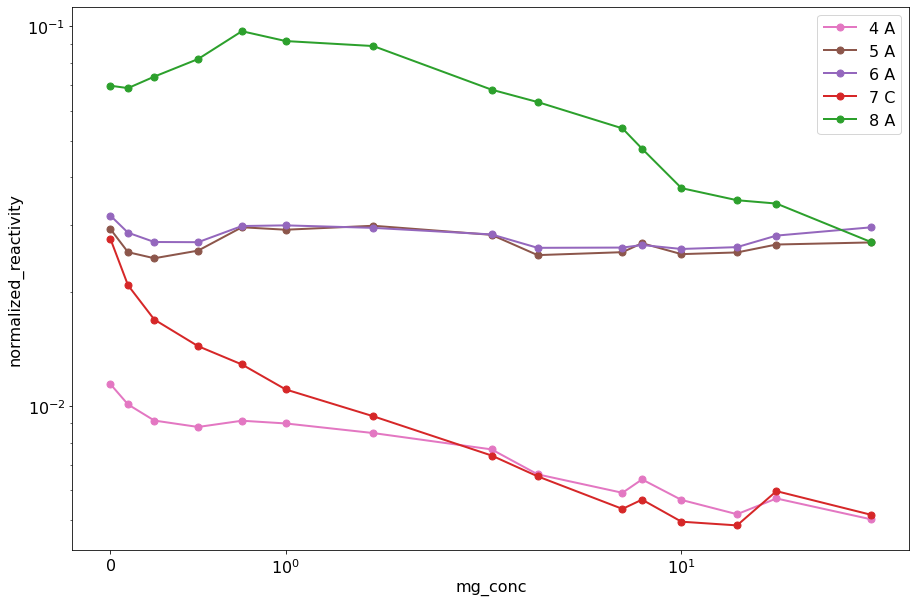

In [14]:
q3 = df["name"] == "CAUGA_UCUAAA"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)
plt.xscale('symlog')
plt.yscale('log')

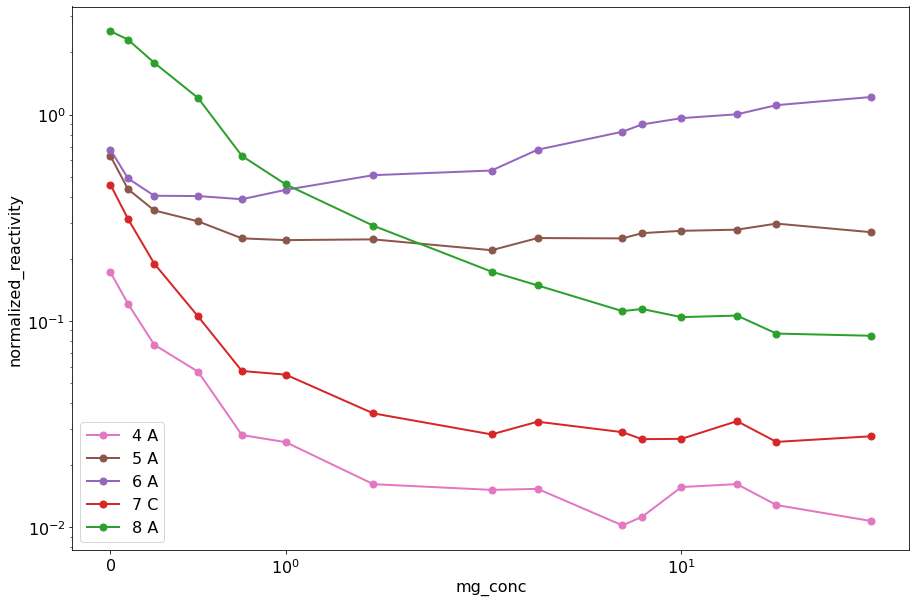

In [15]:
q2 = ~(df['mg_conc'] == 5.0) # figure out why this data is messed up??
q3 = df["name"] == "CAUGG_CCUAAA"
df_sub = df_normed[q2 & q3]
plot_tlr_res_against_mg2(df_sub)
plt.xscale('symlog')
plt.yscale('log')

#### CACGG_CCUAAC

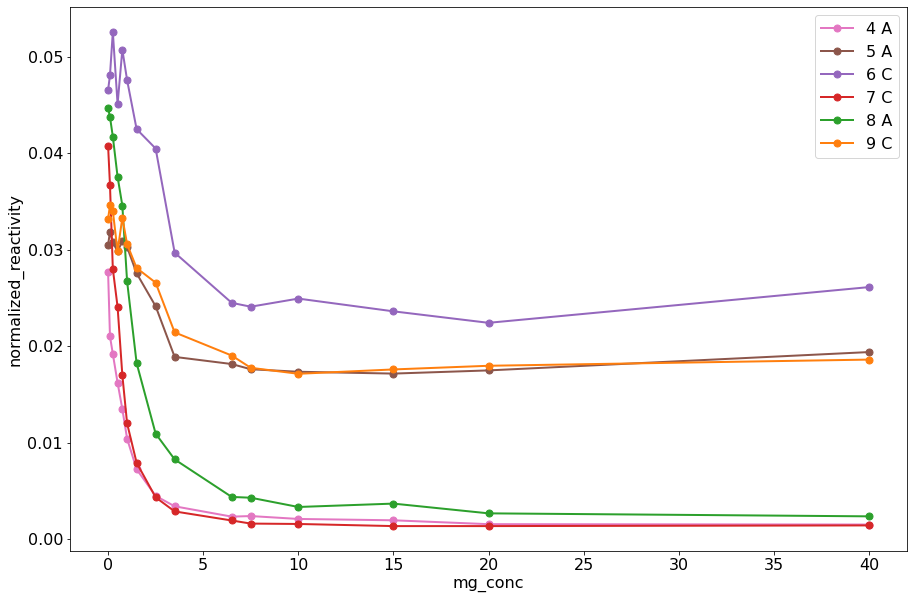

In [16]:
q3 = df["name"] == "CACGG_CCUAAC"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)

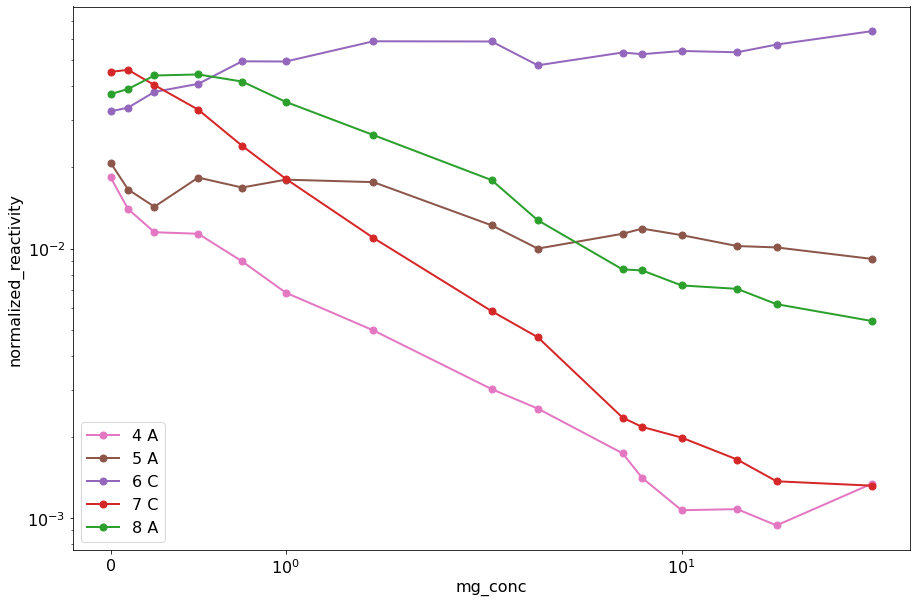

In [17]:
q3 = df["name"] == "CAUGG_CCUAAC"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)
plt.xscale('symlog')
plt.yscale('log')

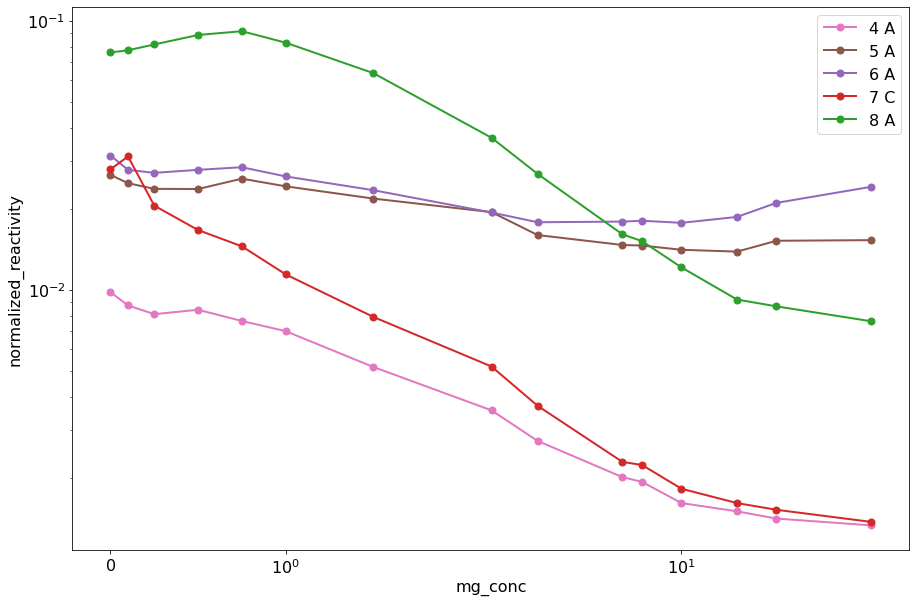

In [18]:
q3 = df["name"] == "CAUGC_GCUAAA"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)
plt.xscale('symlog')
plt.yscale('log')

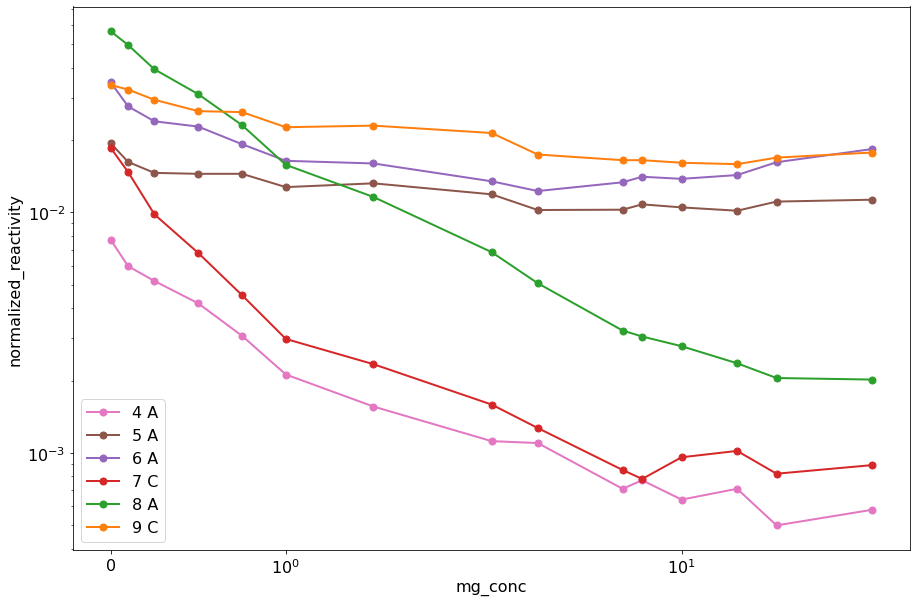

In [19]:
q3 = df["name"] == "CACGG_CCUAAA"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)
plt.xscale('symlog')
plt.yscale('log')

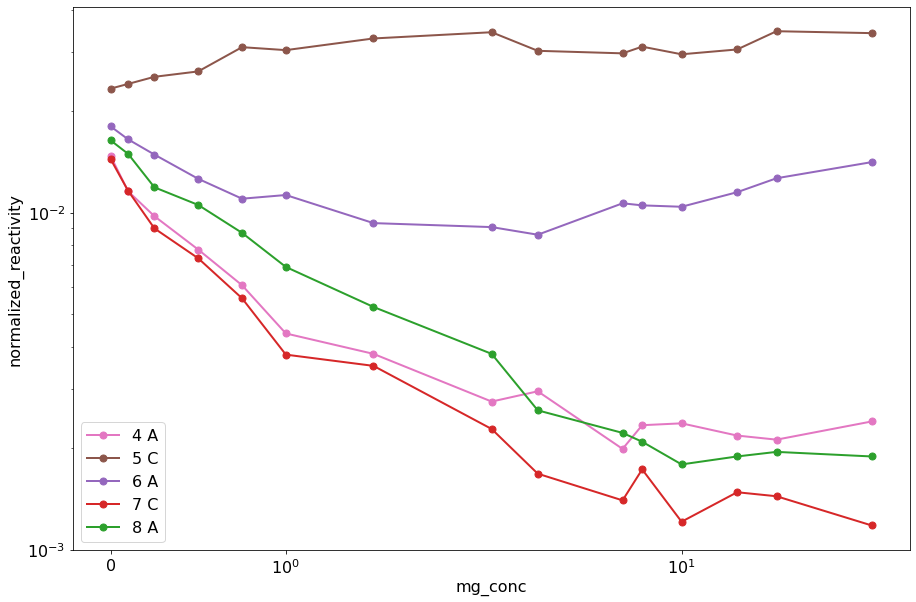

In [20]:
q3 = df["name"] == "CAUGG_CCUACA"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)
plt.xscale('symlog')
plt.yscale('log')

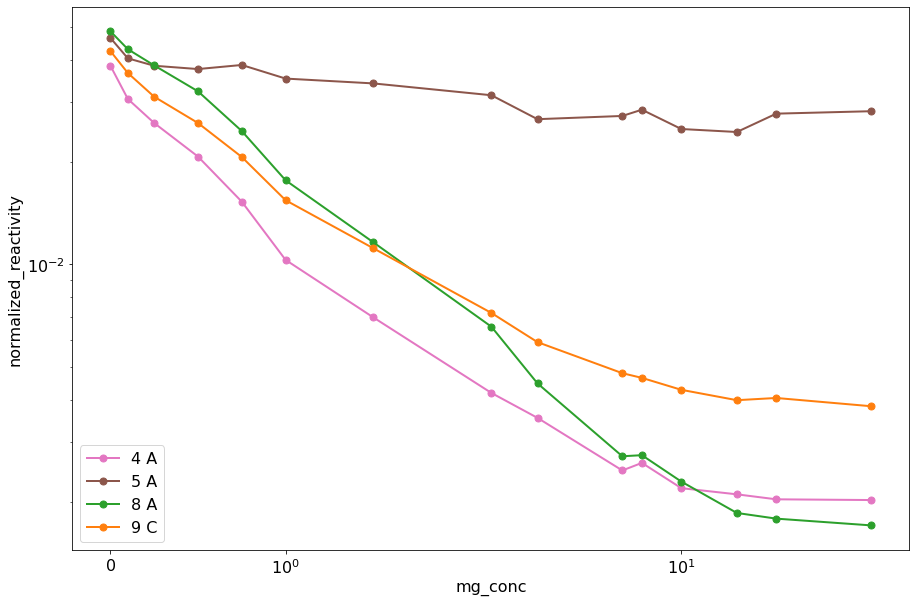

In [21]:
q3 = df["name"] == "GACGG_CCUAAG"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)
plt.xscale('symlog')
plt.yscale('log')

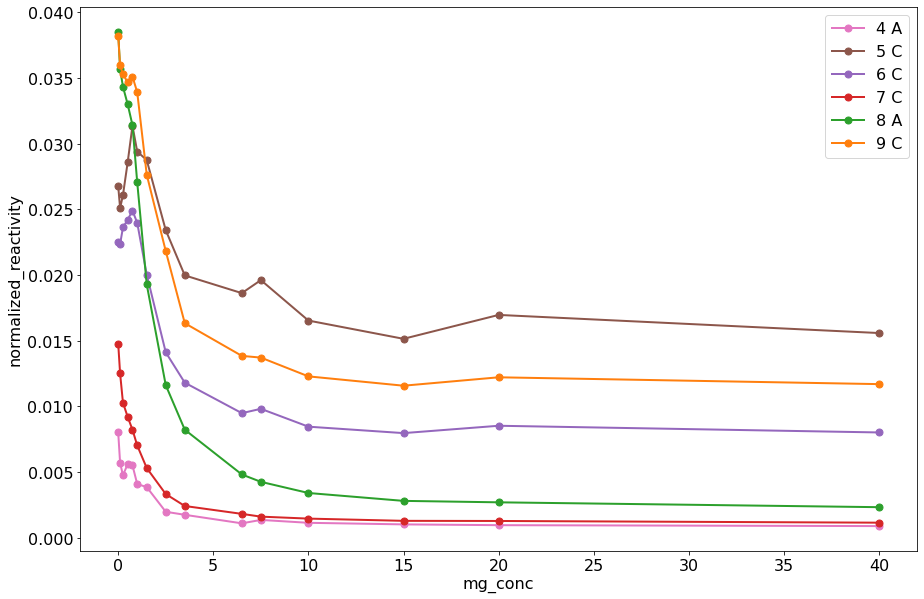

In [22]:
# something wrong here?
q3 = df["name"] == "CACGG_CCUACC"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)

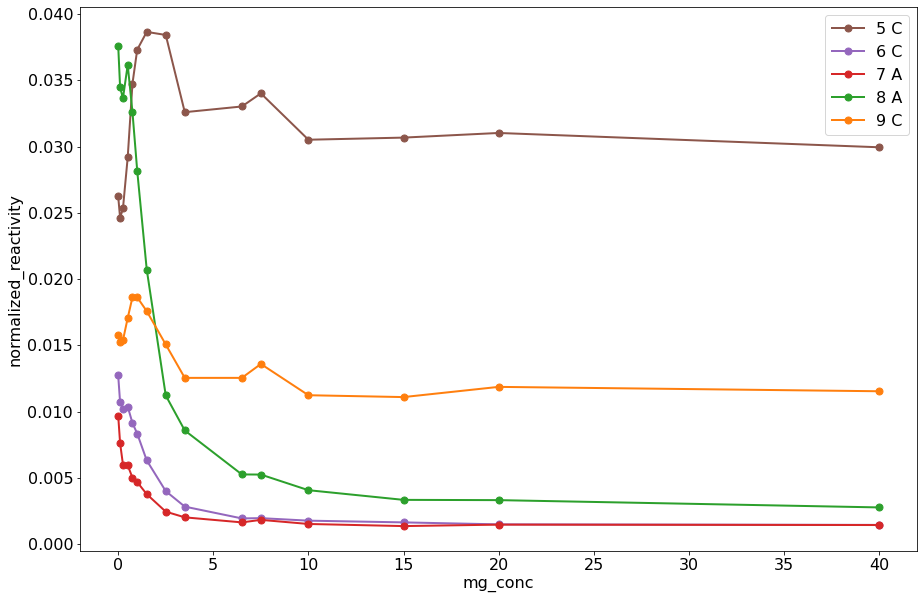

In [23]:
q3 = df["name"] == "AACGG_CCUGCC"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)

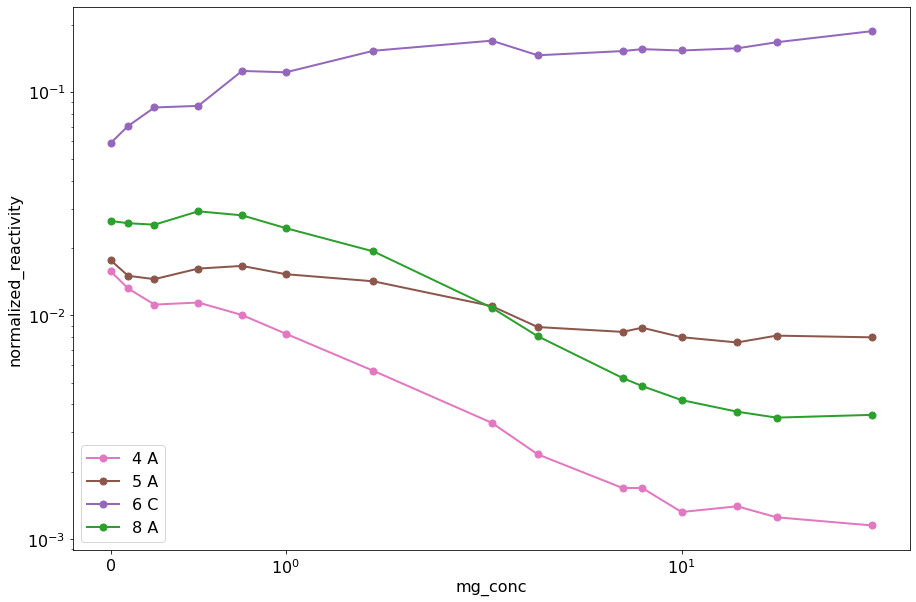

In [24]:
q3 = df["name"] == "UAUGG_CCUAAC"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)
plt.xscale('symlog')
plt.yscale('log')

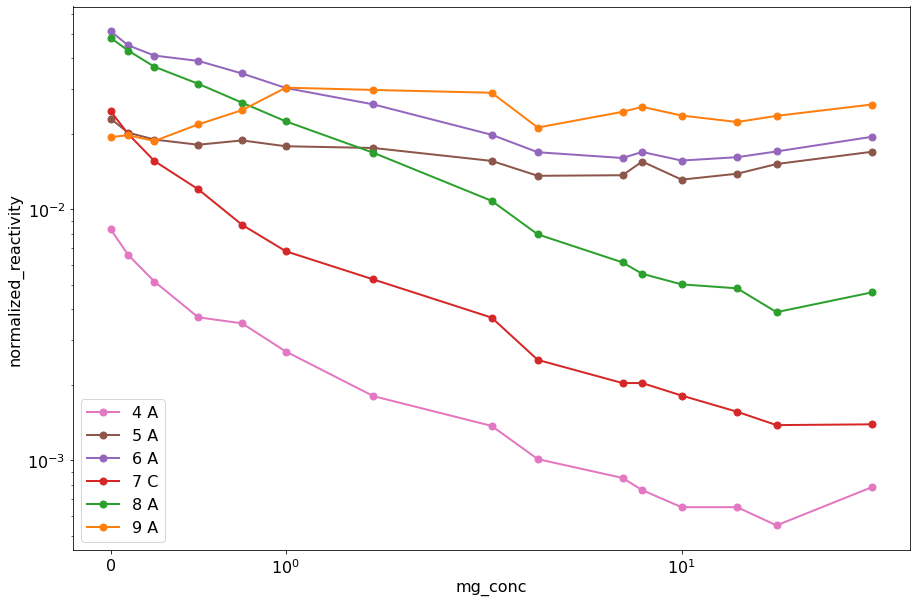

In [25]:
q3 = df["name"] == "CAAGG_CCUAAA"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)
plt.xscale('symlog')
plt.yscale('log')

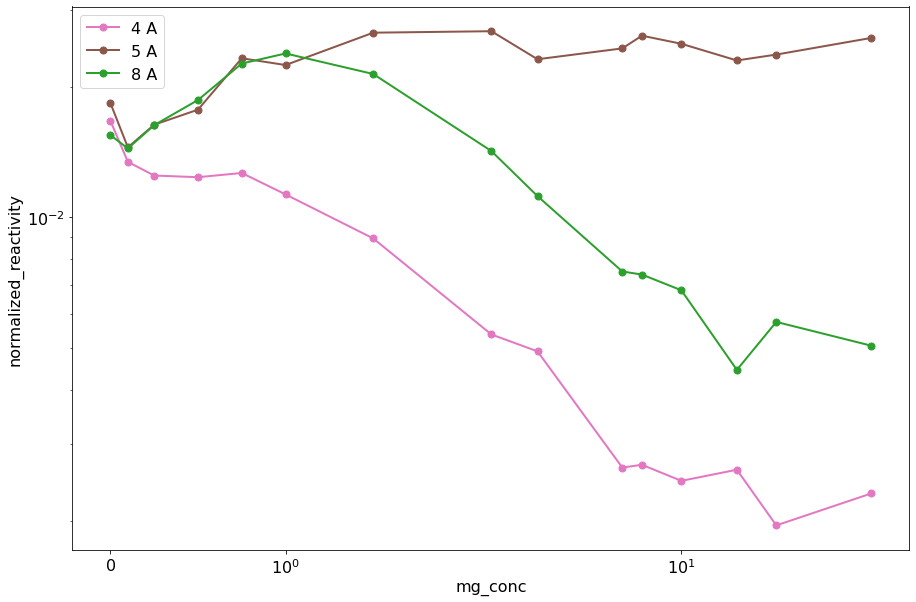

In [26]:
q3 = df["name"] == "UAUGG_CCUAAAG"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)
plt.xscale('symlog')
plt.yscale('log')

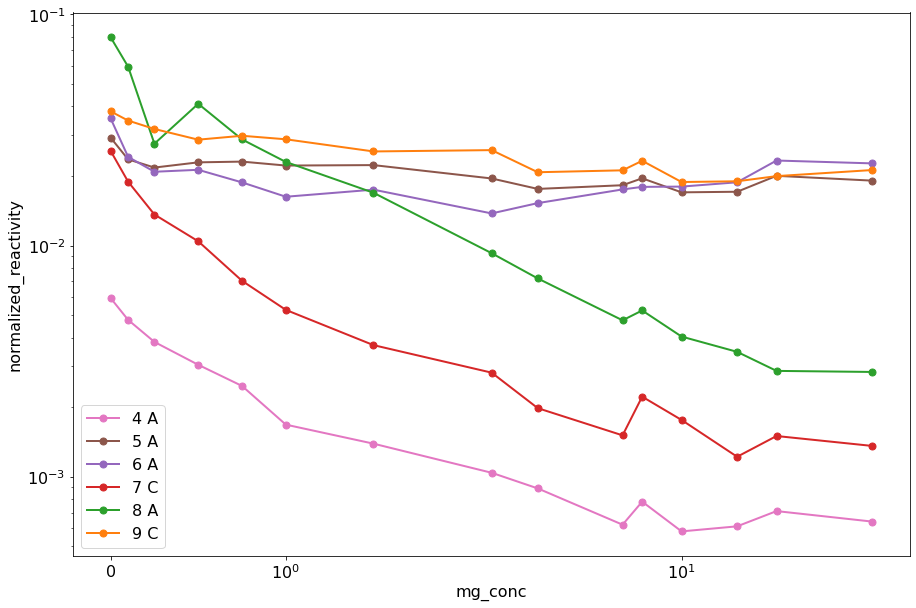

In [27]:
q3 = df["name"] == "CACGC_GCUAAA"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)
plt.xscale('symlog')
plt.yscale('log')

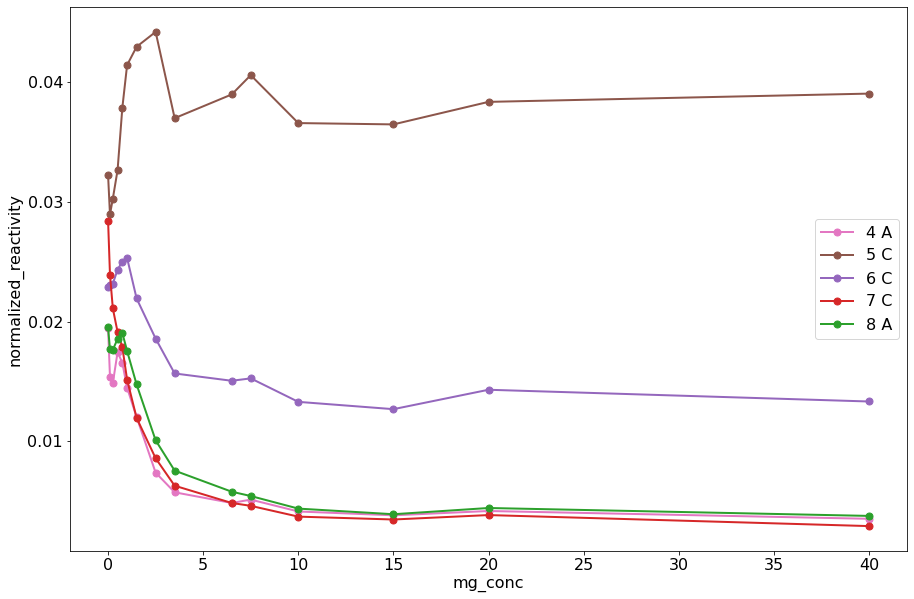

In [28]:
q3 = df["name"] == "CAUGG_CCUACC"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)

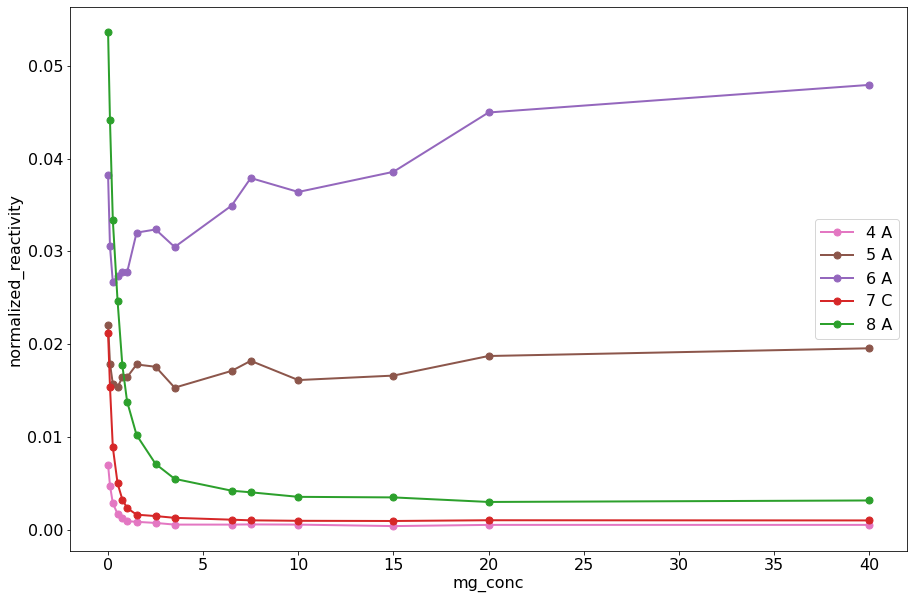

In [29]:
q3 = df["name"] == "CAGGG_CCUAAA"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)

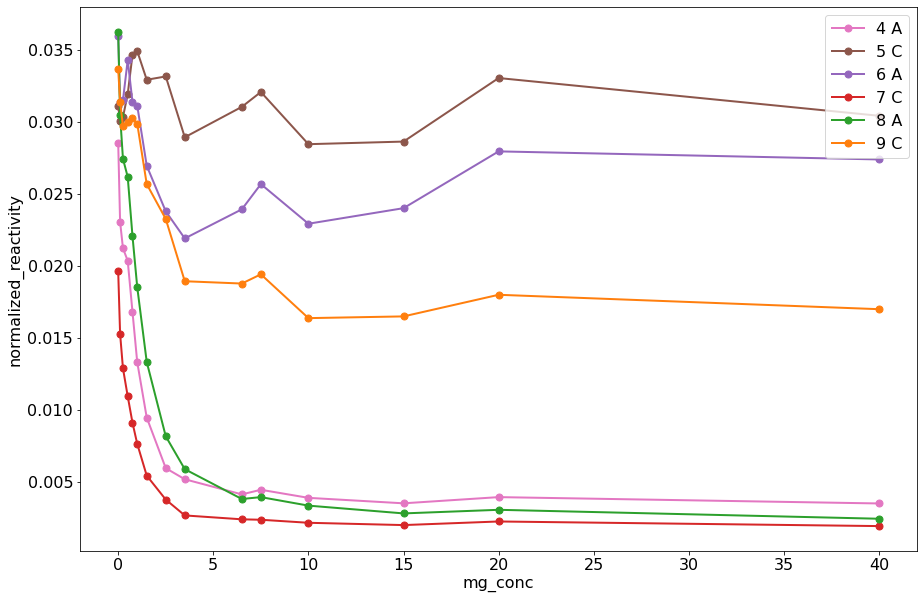

In [30]:
q3 = df["name"] == "CACGG_CCUACA"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)

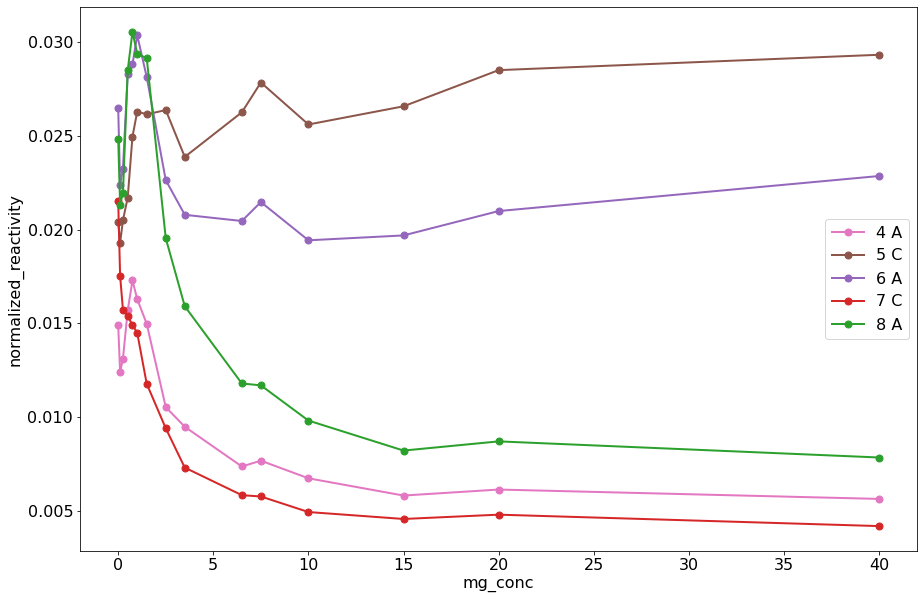

In [31]:
q3 = df["name"] == "CAUGC_GCUACA"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)

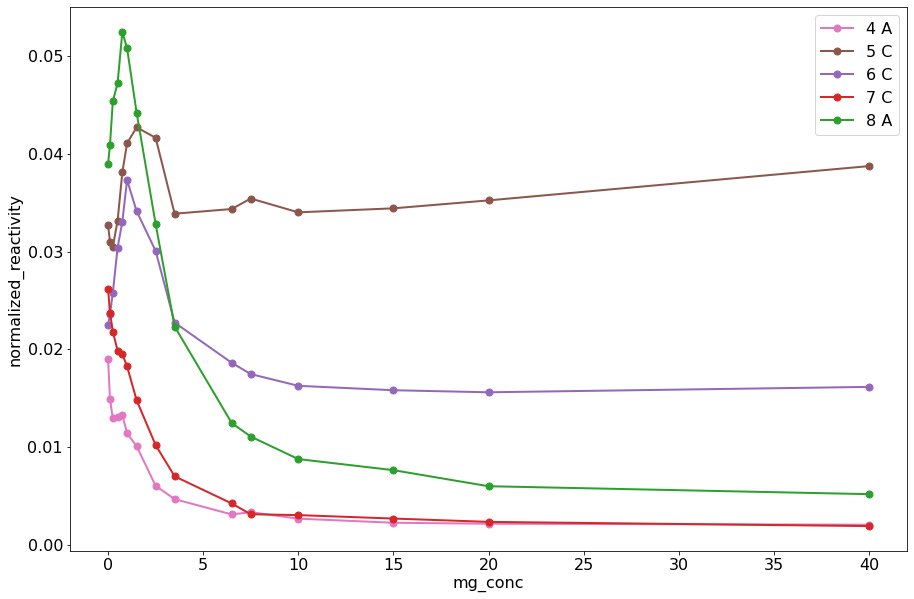

In [32]:
q3 = df["name"] == "CAGGG_CCUACC"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)

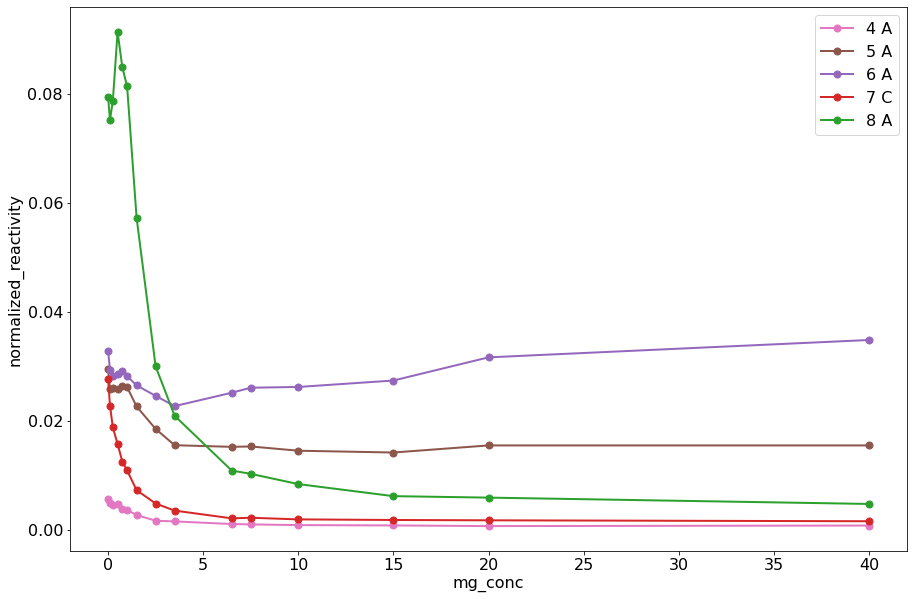

In [33]:
q3 = df["name"] == "CAUGU_ACUAAA"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)

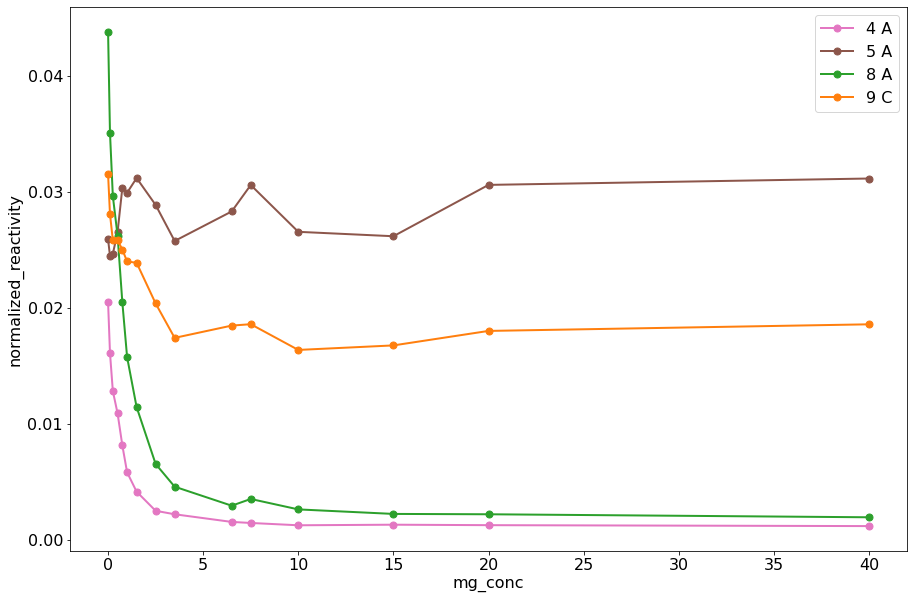

In [34]:
q3 = df["name"] == "UACGG_CCUAAG"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)

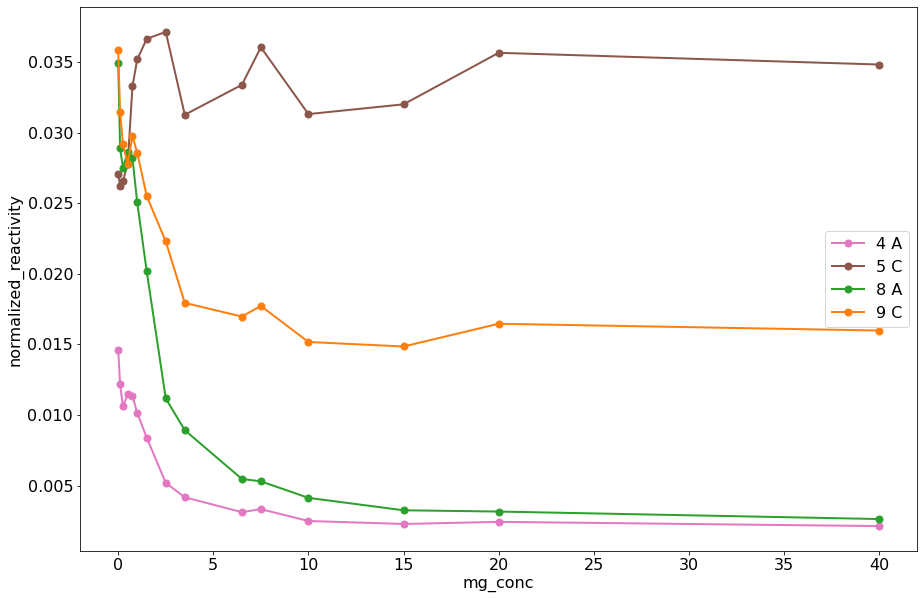

In [35]:
q3 = df["name"] == "UACGG_CCUACG"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)

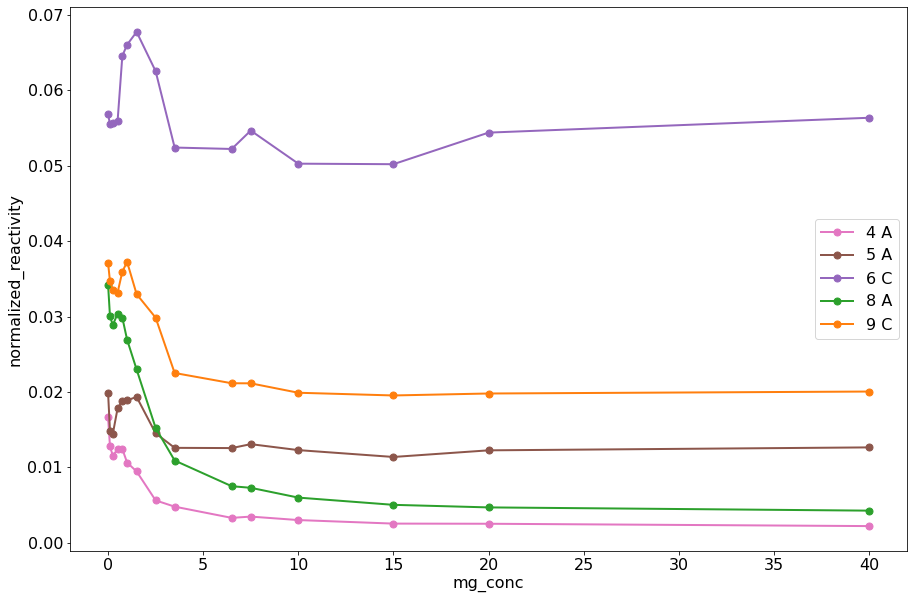

In [36]:
q3 = df["name"] == "UACGG_CCUAAC"
df_sub = df[q2 & q3]
plot_tlr_res_against_mg2(df_sub)

### other plots

In [37]:
q1 = (df['mg_conc'] == 0) # figure out why this data is messed up??
df_sub = df[q1 & q2]
df_sub

index           name                                           sequence  \
6        50  GAUGG_CCUACAC  CGUUCCUGCGAGUAGCGGGAAUGAAAAGGAUGCAGAUGGCUUGCGA...   
19       51   CACGG_CCUUAA  CUAUCAAGCGAGUAGCUUGAUAGAAAGUAAGCUACACGGUCUCCAG...   
32       52   UAUGG_CCUCAC  GGAUAUUGCGAGUAGCGAUGUUCAAAGUCGUCGAUAUGGAAGUAGG...   
45       53   CAUGG_CCUAAU  GUUCUUAGCGAGUAGCUGAGAAUAAAGUGUCGGACAUGGUUGGUUG...   
58       54   CAUGC_GCUUAA  AGACCGGGCGAGUAGCUUGGUCUAAAGAUCGGUACAUGCCGUGAUG...   
...     ...            ...                                                ...   
1481   1179   AAUGG_CCUGAC  CGUUCCUGCGAGUAGCGGGAAUGAAAGCCUAGGAAAUGGUUGCCGG...   
1497   1180   UACGC_GCUAAA  CUAUCAAGCGAGUAGCUUGAUAGAAAUGAAACGAUACGCCUGAUUG...   
1513   1181   CACGG_CCUAUC  UAAUUCCGCGAGUAGCGGAAUUAAAAAGGAUGCACACGGUGCAGUG...   
1529   1182   UACGG_UCUAAG  GUGUCGGGCGAGUAGCCCGGCACAAAUCAUGGAAUACGGUCUAGUG...   
1545   1183   CAUGG_CCUCCC  GAUCGGUGCGAGUAGCAUCGAUCAAAUCGCCUUACAUGGUGUACGG...   

                                              structure data_type  num_reads  \
6     (((((((((.....)))))))))...(((((((((..(((((((((...       DMS      32751   
19    (((((((((.....)))))))))...((((((((...(((((((((...       DMS      28487   
32    (((((((((.....)))))))))...((((((((...(((((((((...       DMS       6059   
45    (((((((((.....)))))))))...((((((((...(((((((((...       DMS       7119   
58    (((((((((.....)))))))))...((((((((...(((((((((...       DMS      25423   
...                                                 ...       ...        ...   
1481  (((((((((.....)))))))))...((((((((...(((((((((...       DMS     116729   
1497  (((((((((.....)))))))))...(((((((((..(((((((((...       DMS      78362   
1513  (((((((((.....)))))))))...((((((((...(((((((((...       DMS     359034   
1529  (((((((((.....)))))))))...(((((((((..(((((((((...       DMS     207712   
1545  (((((((((.....)))))))))...((((((((...(((((((((...       DMS    1015320   

      num_aligns                                               data  no_mut  \
6          28842  [0.010620000000000001, 0.00142, 0.00062, 0.000...   34.37   
19         24140  [0.0020700000000000002, 0.00033000000000000005...   30.07   
32          3807  [0.0013200000000000002, 0.0, 0.00395, 0.00079,...   34.20   
45          4602  [0.00022, 0.00109, 0.0024000000000000002, 0.00...   34.33   
58         19178  [0.00606, 0.0012000000000000001, 0.00157000000...   32.86   
...          ...                                                ...     ...   
1481      112959  [0.012480000000000002, 0.0013200000000000002, ...   25.46   
1497       75551  [0.00206, 0.00029, 0.00101, 0.0001200000000000...   24.88   
1513      344467  [0.0006100000000000001, 0.00436, 0.00249, 0.00...   25.55   
1529      201891  [0.0009600000000000001, 0.00029, 0.00077000000...   25.54   
1545      991006  [0.0008700000000000001, 0.0019100000000000002,...   26.46   

      1_mut  ...   data_6   data_7   data_8   data_9  data_10  data_11  \
6     36.70  ...  0.00189  0.00087  0.02034  0.00066  0.00135  0.00125   
19    36.38  ...  0.05531  0.01431  0.03442  0.05258  0.00079  0.00141   
32    33.99  ...  0.04356  0.00053  0.01264  0.00000  0.00133  0.00584   
45    35.14  ...  0.00213  0.05186  0.01918  0.00000  0.00065  0.00044   
58    36.36  ...  0.03900  0.01785  0.02077  0.00052  0.00141  0.00157   
...     ...  ...      ...      ...      ...      ...      ...      ...   
1481  36.15  ...  0.02883  0.03042  0.02912  0.00046  0.00122  0.00184   
1497  36.24  ...  0.01407  0.00041  0.03944  0.04179  0.00163  0.00263   
1513  36.52  ...  0.02254  0.02141  0.02911  0.04431  0.00138  0.00154   
1529  36.28  ...  0.00066  0.00031  0.05419  0.03823  0.00090  0.00102   
1545  36.68  ...  0.02212  0.02214  0.01610  0.00050  0.00088  0.00103   

                                                 m_data data_3_ins data_6_ins  \
6     [0.0008700000000000001, 0.00045000000000000004...        NaN        NaN   
19    [0.0010400000000000001, 0.0008300000000000001,...        NaN      

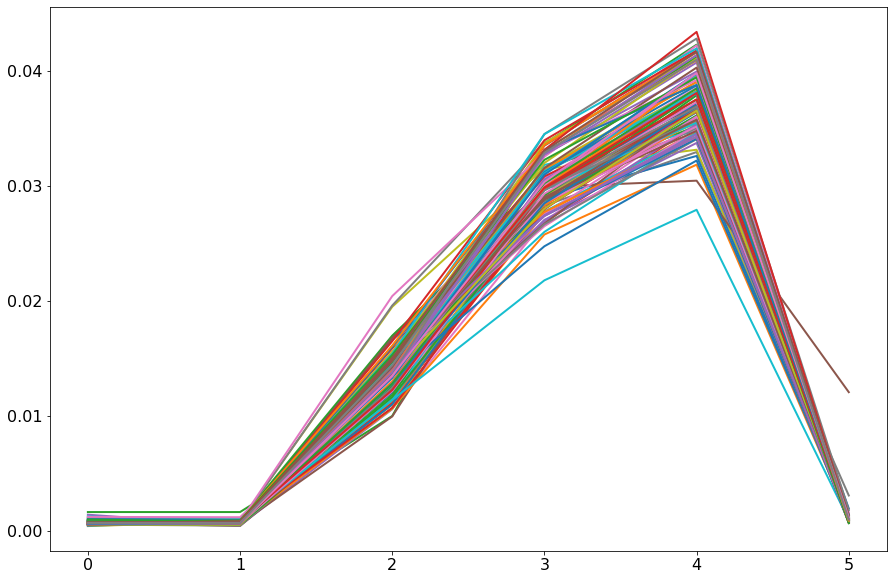

In [38]:
m_ss = structure.SequenceStructure("GGAAAC", "(....)")
for i, row in df_sub.iterrows():
    full_ss = structure.SequenceStructure(row['sequence'], row['structure'])
    bounds = structure.find(full_ss, m_ss)[0][0]
    data = np.array(row['data'][bounds[0]:bounds[1]]) 
    plt.plot(range(0, len(data)), data, lw=2)


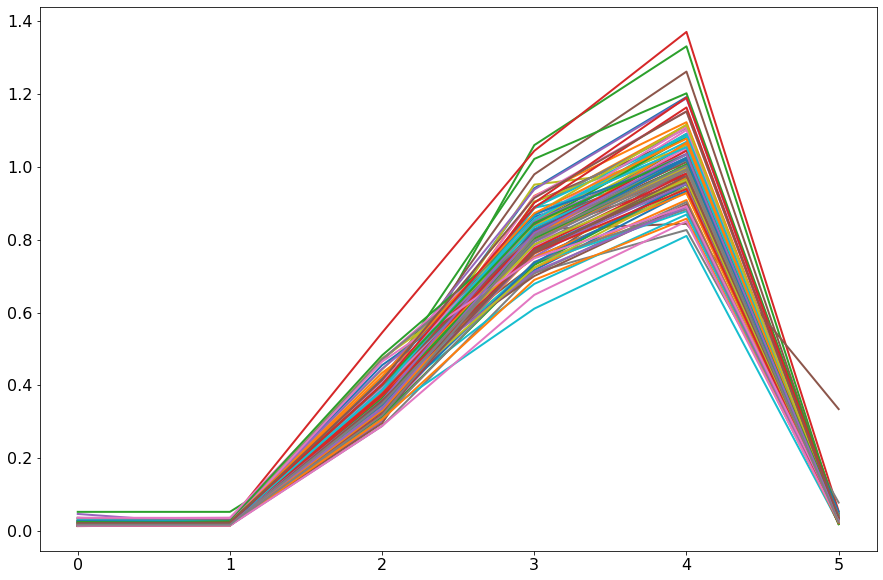

In [39]:
m_ss = structure.SequenceStructure("GGAAAC", "(....)")
for i, row in df_sub.iterrows():
    full_ss = structure.SequenceStructure(row['sequence'], row['structure'])
    bounds = structure.find(full_ss, m_ss)[0][0]
    data = np.array(row['data'][bounds[0]:bounds[1]]) / row['ref_hp_as']
    plt.plot(range(0, len(data)), data, lw=2)

(0.0, 0.06)

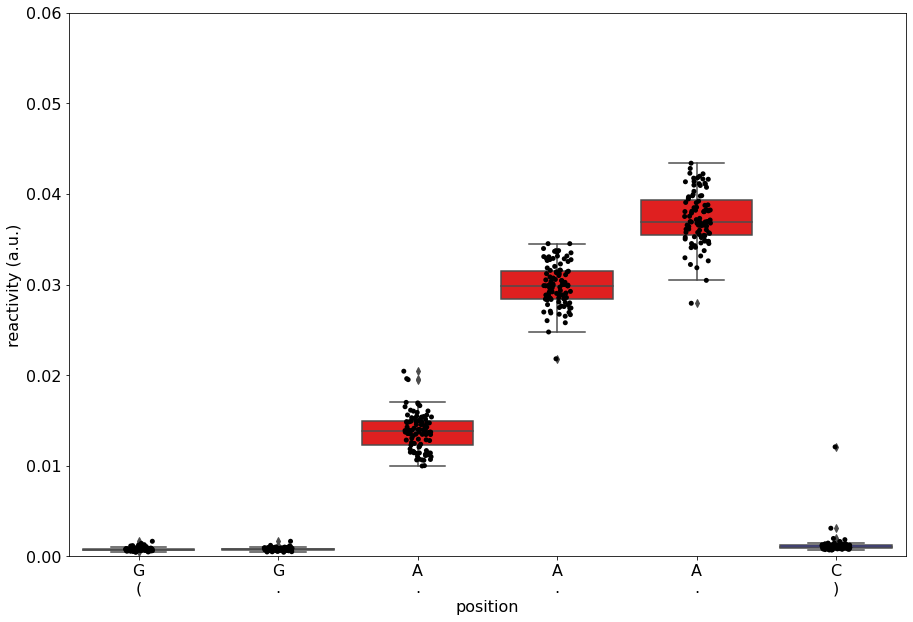

In [40]:
m_ss = structure.SequenceStructure("GGAAAC", "(....)")
all_data = []
for i, row in df_sub.iterrows():
    full_ss = structure.SequenceStructure(row['sequence'], row['structure'])
    bounds = structure.find(full_ss, m_ss)[0][0]
    data = np.array(row['data'][bounds[0]:bounds[1]])
    all_data.append([m_ss.sequence, m_ss.structure, data])
df_m = pd.DataFrame(all_data, columns=["sequence", "structure", "data"])
plot_boxplots(df_m)
plt.ylim([0, 0.06])

(0.0, 1.5)

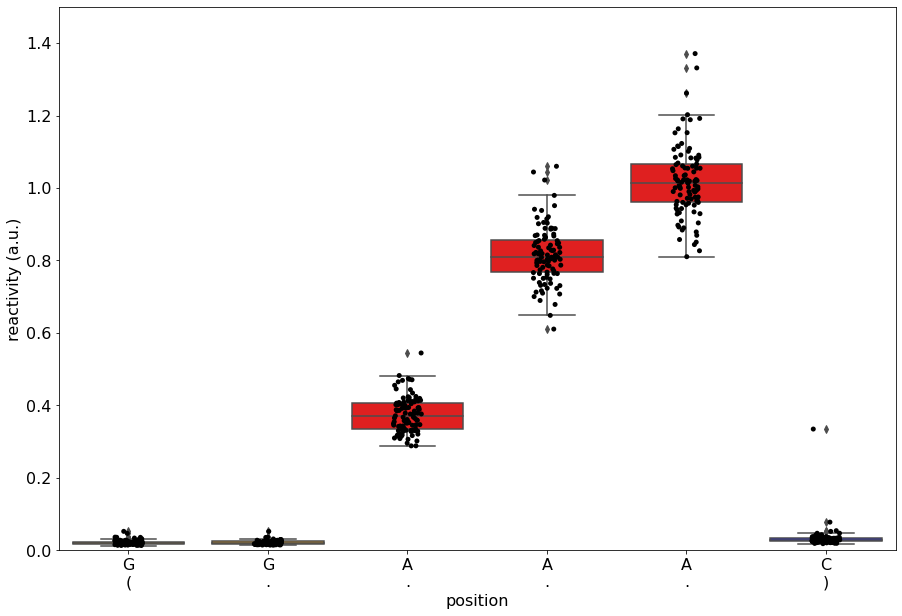

In [41]:
m_ss = structure.SequenceStructure("GGAAAC", "(....)")
all_data = []
for i, row in df_sub.iterrows():
    full_ss = structure.SequenceStructure(row['sequence'], row['structure'])
    bounds = structure.find(full_ss, m_ss)[0][0]
    data = np.array(row['data'][bounds[0]:bounds[1]]) / row['ref_hp_as']
    all_data.append([m_ss.sequence, m_ss.structure, data])
df_m = pd.DataFrame(all_data, columns=["sequence", "structure", "data"])
plot_boxplots(df_m)
plt.ylim([0, 1.5])
#plt.ylim([0, 0.06])

In [42]:
m_ss = structure.SequenceStructure("GGAAAC", "(....)")
all_data = []
for i, row in df_sub.iterrows():
    full_ss = structure.SequenceStructure(row['sequence'], row['structure'])
    bounds = structure.find(full_ss, m_ss)[0][0]
    data = np.array(row['data'][bounds[0]:bounds[1]]) 
    all_data.append([m_ss.sequence, m_ss.structure, data])
df_m = pd.DataFrame(all_data, columns=["sequence", "structure", "data"])
get_percent_from_avg(df_m)


16.284665885851645
14.834041320050712
11.621401938263318
6.2692594562949875
6.184691762708417
22.667375697041404


In [43]:
m_ss = structure.SequenceStructure("GGAAAC", "(....)")
all_data = []
for i, row in df_sub.iterrows():
    full_ss = structure.SequenceStructure(row['sequence'], row['structure'])
    bounds = structure.find(full_ss, m_ss)[0][0]
    data = np.array(row['data'][bounds[0]:bounds[1]]) /  row['ref_hp_as']
    all_data.append([m_ss.sequence, m_ss.structure, data])
df_m = pd.DataFrame(all_data, columns=["sequence", "structure", "data"])
get_percent_from_avg(df_m)

20.864537599384313
18.085660474885916
10.755398564054348
7.205733156772778
7.16506908222133
25.665291504665056


(0.0, 0.06)

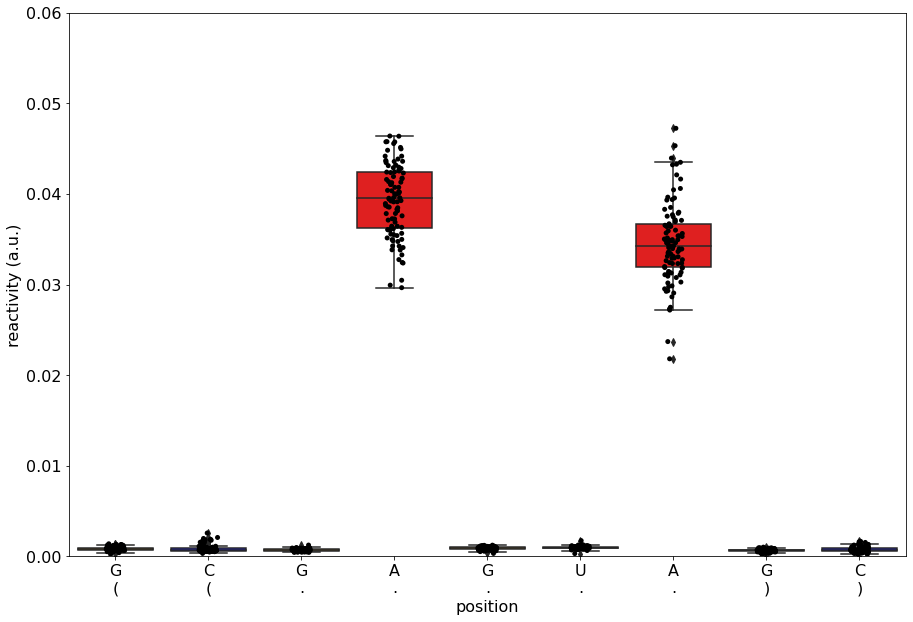

In [44]:
m_ss = structure.SequenceStructure("GCGAGUAGC", "((.....))")
all_data = []
for i, row in df_sub.iterrows():
    full_ss = structure.SequenceStructure(row['sequence'], row['structure'])
    bounds = structure.find(full_ss, m_ss)[0][0]
    data = np.array(row['data'][bounds[0]:bounds[1]])
    all_data.append([m_ss.sequence, m_ss.structure, data])
df_m = pd.DataFrame(all_data, columns=["sequence", "structure", "data"])
plot_boxplots(df_m)
plt.ylim([0, 0.06])

(0.0, 0.06)

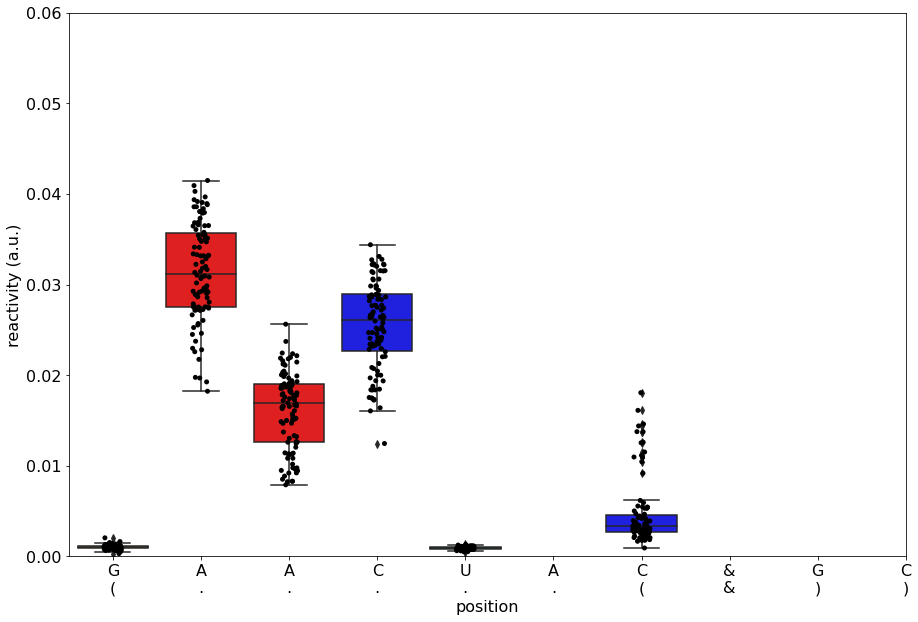

In [45]:
m_ss = structure.SequenceStructure("GAACUAC&GC", "(.....(&))")
all_data = []
for i, row in df_sub.iterrows():
    full_ss = structure.SequenceStructure(row['sequence'], row['structure'])
    bounds = structure.find(full_ss, m_ss)[0][0]
    data = np.array(row['data'][bounds[0]:bounds[1]])
    all_data.append([m_ss.sequence, m_ss.structure, data])
df_m = pd.DataFrame(all_data, columns=["sequence", "structure", "data"])
plot_boxplots(df_m)
plt.ylim([0, 0.06])

(0.0, 0.1)

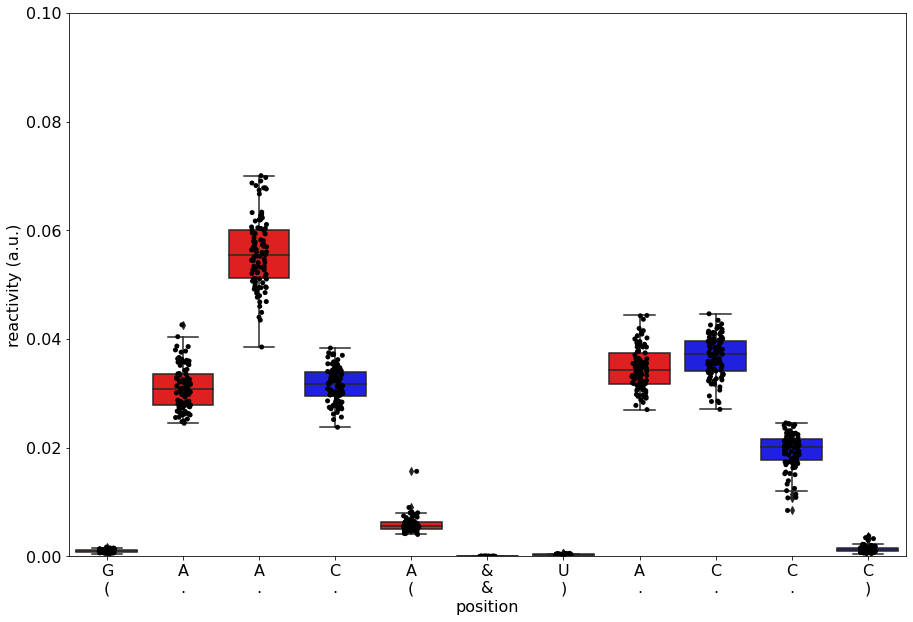

In [46]:
m_ss = structure.SequenceStructure("GAACA&UACCC", "(...(&)...)")
all_data = []
for i, row in df_sub.iterrows():
    full_ss = structure.SequenceStructure(row['sequence'], row['structure'])
    bounds = structure.find(full_ss, m_ss)[0]
    bounds_1 = bounds[0]
    bounds_2 = bounds[1]
    data = np.array(row['data'][bounds_1[0]:bounds_1[1]] + [0] + row['data'][bounds_2[0]:bounds_2[1]])
    all_data.append([m_ss.sequence, m_ss.structure, data])
df_m = pd.DataFrame(all_data, columns=["sequence", "structure", "data"])
plot_boxplots(df_m)
plt.ylim([0, 0.10])

## find simplest mutations 1 mutation

In [47]:
q1 = df["count_muts"] == 1
q2 = df["count_ins"] == 0
q3 = df["count_dels"] == 0
q4 = ~(df['mg_conc'] == 5.0) # figure out why this data is messed up??
df_sub = df[q1 & q2 & q3 & q4]
print(df_sub["name"].unique())

['UAUGG_CCUAAC' 'UACGG_CCUAAG' 'AAUGG_CCUAAG']


In [48]:
for name, g in df_sub.groupby("name"):
    print(name, g.iloc[0]["dg"], g.iloc[0]["mutations"])
 

AAUGG_CCUAAG -9.72 [7]
UACGG_CCUAAG -10.72 [9]
UAUGG_CCUAAC -11.26 [6]


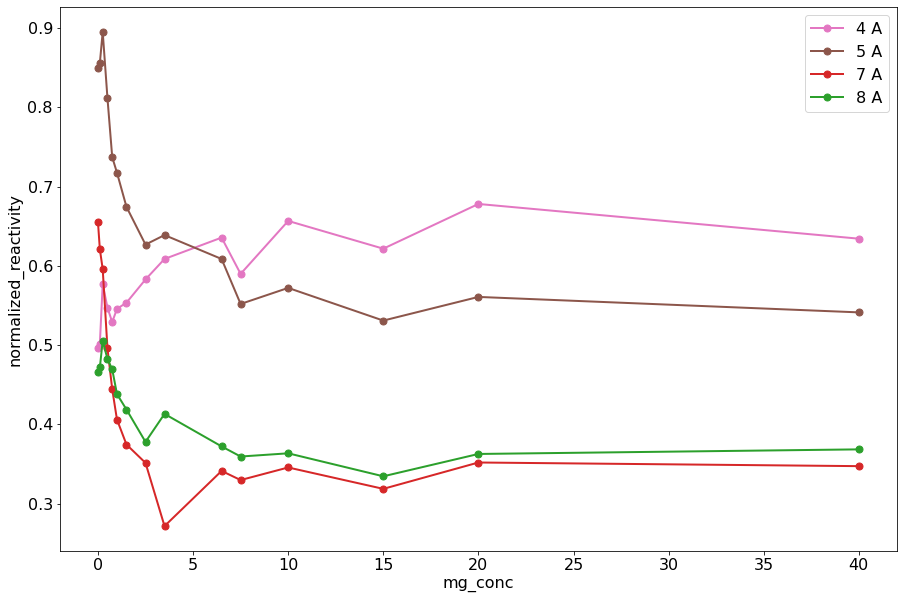

In [49]:
q5 = df["name"] == "AAUGG_CCUAAG"
df_sub_1 = df_normed[q1 & q2 & q3 & q4 & q5]
plot_tlr_res_against_mg2(df_sub_1)


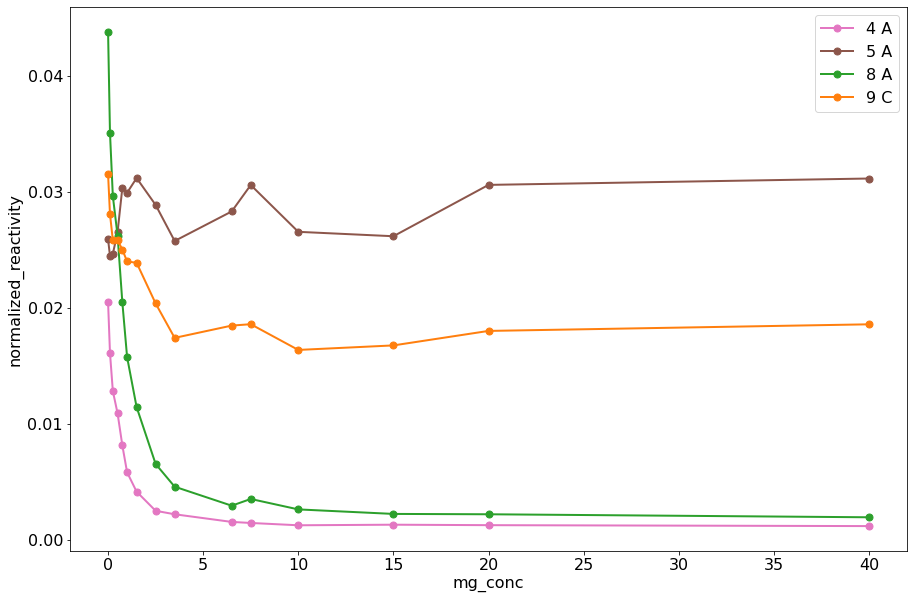

In [50]:
q5 = df["name"] == "UACGG_CCUAAG"
df_sub_1 = df[q1 & q2 & q3 & q4 & q5]
plot_tlr_res_against_mg2(df_sub_1)

/var/folders/hk/619kws3150qdh6ln0_d8ms7c0000gn/T/ipykernel_52953/1273066113.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sub_1 = df_sub[q5]


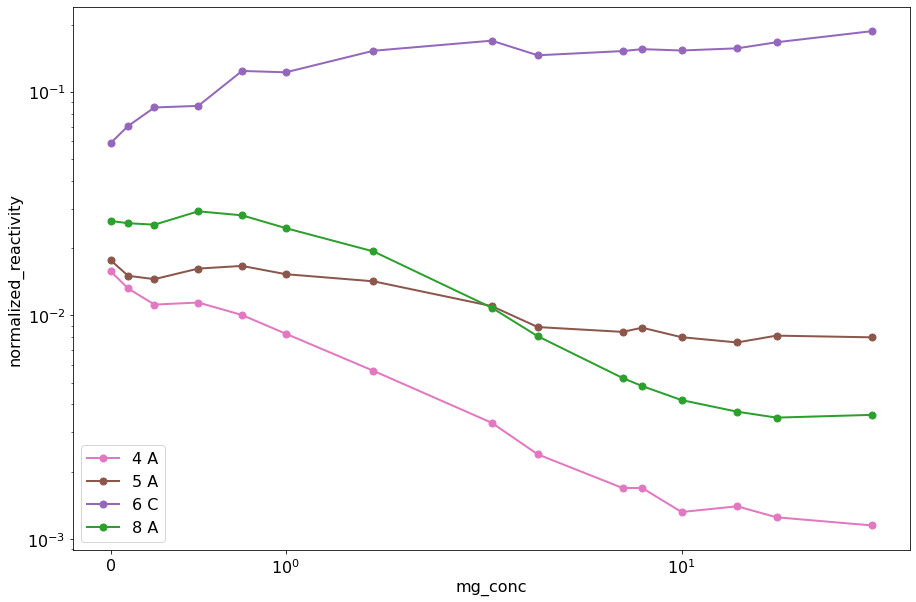

In [51]:
q5 = df["name"] == "UAUGG_CCUAAC"
df_sub_1 = df_sub[q5]
plot_tlr_res_against_mg2(df_sub_1)
plt.xscale("symlog")
plt.yscale("log")

## find simplest mutations 2 mutations

In [52]:
q1 = df["count_muts"] == 2
q2 = df["count_ins"] == 0
q3 = df["count_dels"] == 0
q4 = ~(df['mg_conc'] == 5.0) # figure out why this data is messed up??
df_sub = df[q1 & q2 & q3 & q4]
print(df_sub["name"].unique())

['UAUGG_CCUCAC' 'CAUGG_CCUAAU' 'UAGGG_CCUAAC' 'UAUGG_CUUAAC'
 'AAUGG_CCUACG' 'AAUGG_UCUAAG' 'CAUGG_CCUAAA' 'CAUGG_CCUAAC'
 'GACGG_CCUAAG' 'UACGG_CCUACG' 'UACGG_CCUAAC' 'UACGG_CCUAAA'
 'AAUGG_CCUAAA' 'AAUGG_CCUAAC' 'GAUGG_CCUAAA' 'UAUGG_CCUACC'
 'UAUGG_UCUAAC' 'CACGG_CCUAAG' 'UAAGG_CCUAAC' 'UACGG_CCUAAU'
 'UACGG_UCUAAG']


In [53]:
data = []
for name, g in df_sub.groupby("name"):
    print(name, g.iloc[0]["dg"], g.iloc[0]["mutations"])
    data.append([name, g.iloc[0]["dg"], "-".join([str(x) for x in g.iloc[0]["mutations"]])])

AAUGG_CCUAAA -10.53 [6, 7]
AAUGG_CCUAAC -10.49 [6, 7]
AAUGG_CCUACG -9.16 [5, 7]
AAUGG_UCUAAG -8.35 [1, 7]
CACGG_CCUAAG -9.71 [7, 9]
CAUGG_CCUAAA -11.77 [6, 7]
CAUGG_CCUAAC -11.39 [6, 7]
CAUGG_CCUAAU -9.63 [6, 7]
GACGG_CCUAAG -11.3 [7, 9]
GAUGG_CCUAAA -10.42 [6, 7]
UAAGG_CCUAAC -9.85 [6, 9]
UACGG_CCUAAA -10.59 [6, 9]
UACGG_CCUAAC -10.69 [6, 9]
UACGG_CCUAAU -10.14 [6, 9]
UACGG_CCUACG -10.71 [5, 9]
UACGG_UCUAAG -10.0 [1, 9]
UAGGG_CCUAAC -9.53 [6, 9]
UAUGG_CCUACC -10.39 [5, 6]
UAUGG_CCUCAC -9.64 [4, 6]
UAUGG_CUUAAC -9.3 [2, 6]
UAUGG_UCUAAC -10.34 [1, 6]


In [54]:
df_mut_2 = pd.DataFrame(data, columns="name,dg,mut_pos".split(","))

In [55]:
df_mut_2.sort_values("dg")

name     dg mut_pos
5   CAUGG_CCUAAA -11.77     6-7
6   CAUGG_CCUAAC -11.39     6-7
8   GACGG_CCUAAG -11.30     7-9
14  UACGG_CCUACG -10.71     5-9
12  UACGG_CCUAAC -10.69     6-9
11  UACGG_CCUAAA -10.59     6-9
0   AAUGG_CCUAAA -10.53     6-7
1   AAUGG_CCUAAC -10.49     6-7
9   GAUGG_CCUAAA -10.42     6-7
17  UAUGG_CCUACC -10.39     5-6
20  UAUGG_UCUAAC -10.34     1-6
13  UACGG_CCUAAU -10.14     6-9
15  UACGG_UCUAAG -10.00     1-9
10  UAAGG_CCUAAC  -9.85     6-9
4   CACGG_CCUAAG  -9.71     7-9
18  UAUGG_CCUCAC  -9.64     4-6
7   CAUGG_CCUAAU  -9.63     6-7
16  UAGGG_CCUAAC  -9.53     6-9
19  UAUGG_CUUAAC  -9.30     2-6
2   AAUGG_CCUACG  -9.16     5-7
3   AAUGG_UCUAAG  -8.35     1-7

In [56]:
for mut_str, g in df_mut_2.groupby("mut_pos"):
    print(mut_str)
    g = g.sort_values("dg")
    print(g)

1-6
            name     dg mut_pos
20  UAUGG_UCUAAC -10.34     1-6
1-7
           name    dg mut_pos
3  AAUGG_UCUAAG -8.35     1-7
1-9
            name    dg mut_pos
15  UACGG_UCUAAG -10.0     1-9
2-6
            name   dg mut_pos
19  UAUGG_CUUAAC -9.3     2-6
4-6
            name    dg mut_pos
18  UAUGG_CCUCAC -9.64     4-6
5-6
            name     dg mut_pos
17  UAUGG_CCUACC -10.39     5-6
5-7
           name    dg mut_pos
2  AAUGG_CCUACG -9.16     5-7
5-9
            name     dg mut_pos
14  UACGG_CCUACG -10.71     5-9
6-7
           name     dg mut_pos
5  CAUGG_CCUAAA -11.77     6-7
6  CAUGG_CCUAAC -11.39     6-7
0  AAUGG_CCUAAA -10.53     6-7
1  AAUGG_CCUAAC -10.49     6-7
9  GAUGG_CCUAAA -10.42     6-7
7  CAUGG_CCUAAU  -9.63     6-7
6-9
            name     dg mut_pos
12  UACGG_CCUAAC -10.69     6-9
11  UACGG_CCUAAA -10.59     6-9
13  UACGG_CCUAAU -10.14     6-9
10  UAAGG_CCUAAC  -9.85     6-9
16  UAGGG_CCUAAC  -9.53     6-9
7-9
           name     dg mut_pos
8  GACGG_CCUAAG -11.

In [57]:
df[df["name"] == "CAUGG_CCUAAA"].iloc[0][["mut_6", "mut_7", "dg"]]

mut_6        A
mut_7        C
dg      -11.77
Name: 312, dtype: object

In [58]:
df[df["name"] == "CAUGG_CCUAAC"].iloc[0][["mut_6", "mut_7", "dg"]]

mut_6        C
mut_7        C
dg      -11.39
Name: 363, dtype: object

In [59]:
df[df["name"] == "AAUGG_CCUAAA"].iloc[0][["mut_6", "mut_7", "dg"]]

mut_6        A
mut_7        A
dg      -10.53
Name: 805, dtype: object

In [60]:
df[df["name"] == "AAUGG_CCUAAC"].iloc[0][["mut_6", "mut_7", "dg"]]

mut_6        C
mut_7        A
dg      -10.49
Name: 839, dtype: object

In [61]:
df[df["name"] == "GAUGG_CCUAAA"].iloc[0][["mut_6", "mut_7", "dg"]]

mut_6        A
mut_7        G
dg      -10.42
Name: 890, dtype: object

In [62]:
df[df["name"] == "CAUGG_CCUAAU"].iloc[0][["mut_6", "mut_7", "dg", "aligned_seq"]]

mut_6                    U
mut_7                    C
dg                   -9.63
aligned_seq    CCUAAUCAUGG
Name: 39, dtype: object

## grouping mutations together?

### A8

In [63]:
q1 = pd.isnull(df["mut_8"]) 
q2 = df["count_ins"] == 0
q3 = df["count_dels"] == 0
q4 = ~(df['mg_conc'] == 5.0) # figure out why this data is messed up??
messed_up = ["CAUGG_CCUAAA", "CAUGA_UCUAAA"]
q5 = ~df['name'].isin(messed_up)
df_sub = df_normed[q1 & q2 & q3 & q4 & q5]


In [64]:

df_sub['name'].unique()

array(['CACGG_CCUUAA', 'UAUGG_CCUCAC', 'CAUGG_CCUAAU', 'CAUGC_GCUUAA',
       'AACGG_CCUACG', 'UAGGG_CCUAAC', 'CAUGG_CCUGAA', 'CAUGG_CCUCAA',
       'CACGG_CCUAGA', 'UAUGG_CUUAAC', 'CACGG_CCUCAC', 'AAUGG_CCUACG',
       'CACGG_CCUAGC', 'GACGG_CCUAAA', 'CAUGC_GCUCAA', 'CAUGC_GCUGAA',
       'AAUGG_UCUAAG', 'CACGG_CCUAAC', 'CAUGG_CCUAAC', 'CAUGC_GCUAAA',
       'CACGG_CCUAAA', 'CAUGG_CCUACA', 'GACGG_CCUAAG', 'CACGG_CCUACC',
       'AACGG_CCUGCC', 'UAUGG_CCUAAC', 'CAAGG_CCUAAA', 'CACGC_GCUAAA',
       'CAUGG_CCUACC', 'CAGGG_CCUAAA', 'CACGG_CCUACA', 'CAUGC_GCUACA',
       'CAGGG_CCUACC', 'CAUGU_ACUAAA', 'UACGG_CCUAAG', 'UACGG_CCUACG',
       'UACGG_CCUAAC', 'CAAGG_CCUAAC', 'CAGGG_CCUAAC', 'CAAGG_CCUACC',
       'UACGG_CCUAAA', 'AAUGG_CCUUCC', 'CAGGG_CCUACA', 'AAUGG_CCUAAA',
       'CAAGC_GCUAAA', 'AAUGG_CCUAAC', 'CAUGG_CCUUCC', 'CAGGC_GCUAAA',
       'GAUGG_CCUAAA', 'UAUGG_CCUACC', 'UACGG_CCUACC', 'UACGC_GCUACG',
       'CAUGG_CCUUAA', 'UAUGG_UCUAAC', 'UACGC_GCUAAG', 'UACGA_UCUAAG',
      

In [65]:
df_sub[df_sub['name'] == 'CACGG_CCUUAA'].iloc[0]["mutations"]

[4, 6, 7, 9]

In [66]:
df_sub_1 = df_sub[df_sub['dg'] < -11]


In [67]:
def plot_same_tlr_res_against_mg2(df, res_pos):
    fig, ax = plt.subplots()
    for name, g in df.groupby('name'):
        if len(g) < 5:
            continue
        g.sort_values("mg_conc", inplace=True)
        ax.plot(g["mg_conc"], g[f"data_{res_pos}"], lw=2, marker='o', markersize=7,
                label=str(name) + " " + str(g.iloc[0]["dg"]))
        #print(g.iloc[0]["aligned_seq"][res_pos-1])
    ax.legend()
    ax.set_xlabel("mg_conc")
    ax.set_ylabel("normalized_reactivity")
        

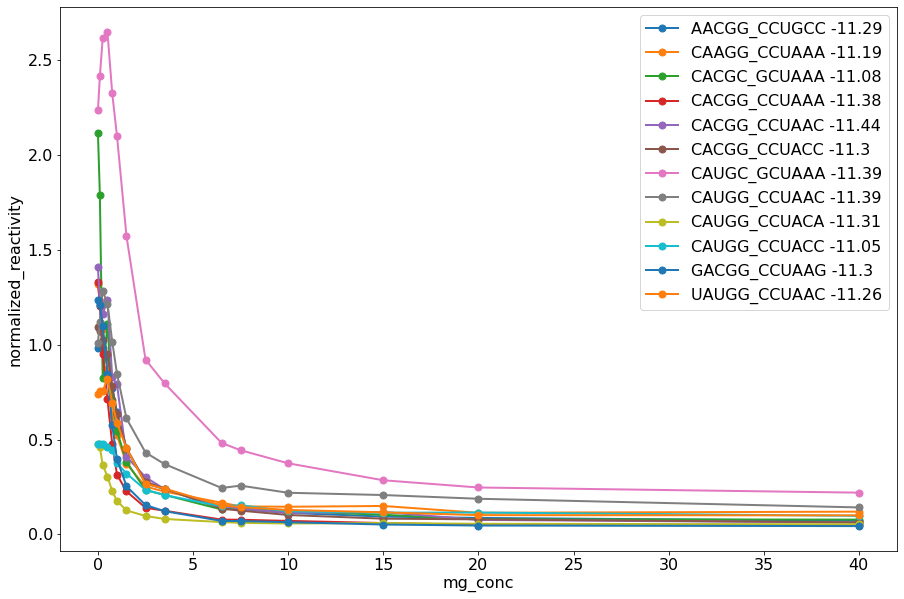

In [68]:
plot_same_tlr_res_against_mg2(df_sub_1, 8)

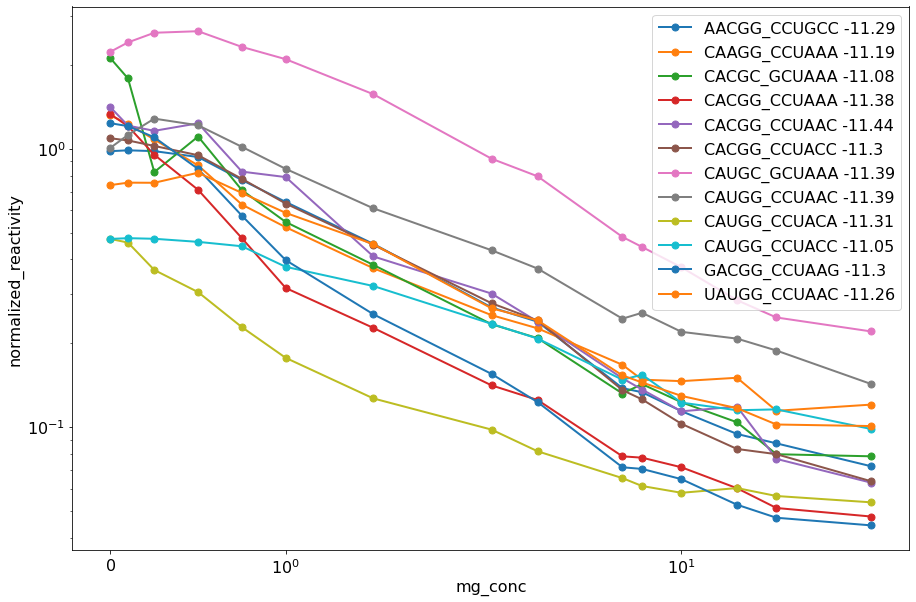

In [69]:
plot_same_tlr_res_against_mg2(df_sub_1, 8)
plt.xscale("symlog")
plt.yscale("log")

In [70]:
unique_df = df_sub_1.drop_duplicates(subset=['name'], keep='first')


In [71]:
unique_df[['name', 'dg']].sort_values("dg")

name     dg
347  CACGG_CCUAAC -11.44
364  CAUGG_CCUAAC -11.39
381  CAUGC_GCUAAA -11.39
398  CACGG_CCUAAA -11.38
415  CAUGG_CCUACA -11.31
432  GACGG_CCUAAG -11.30
449  CACGG_CCUACC -11.30
466  AACGG_CCUGCC -11.29
483  UAUGG_CCUAAC -11.26
500  CAAGG_CCUAAA -11.19
534  CACGC_GCUAAA -11.08
551  CAUGG_CCUACC -11.05

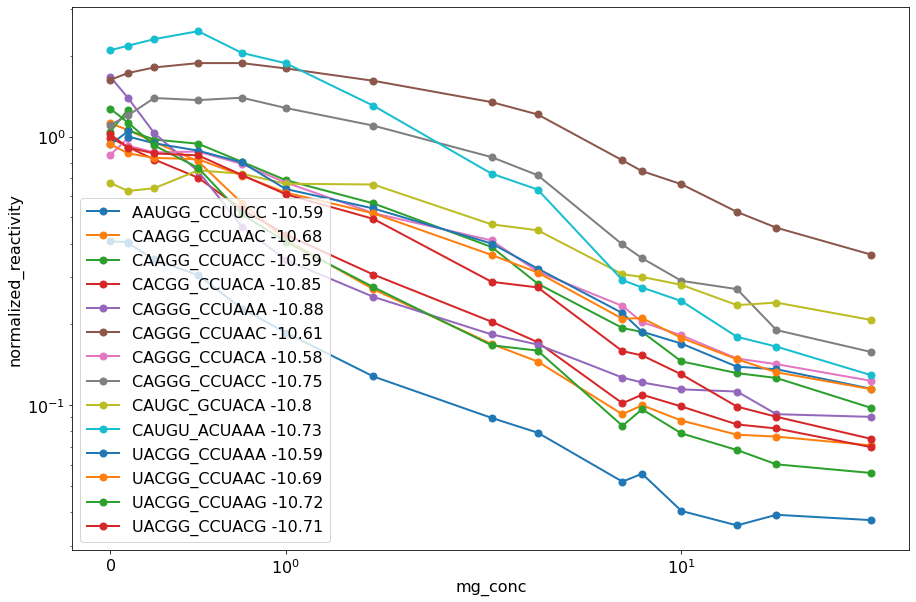

In [72]:
df_sub_2 = df_sub[(df_sub['dg'] < -10.55) & (df_sub['dg'] > -11)]
plot_same_tlr_res_against_mg2(df_sub_2, 8)
plt.xscale("symlog")
plt.yscale("log")


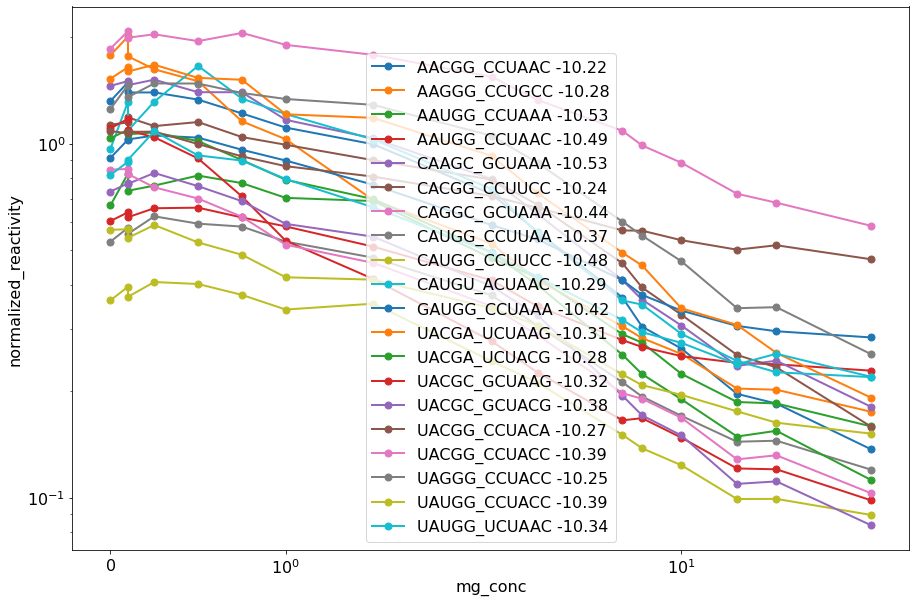

In [73]:
df_sub_2 = df_sub[(df_sub['dg'] < -10.20) & (df_sub['dg'] > -10.55)]
plot_same_tlr_res_against_mg2(df_sub_2, 8)
plt.xscale("symlog")
plt.yscale("log")

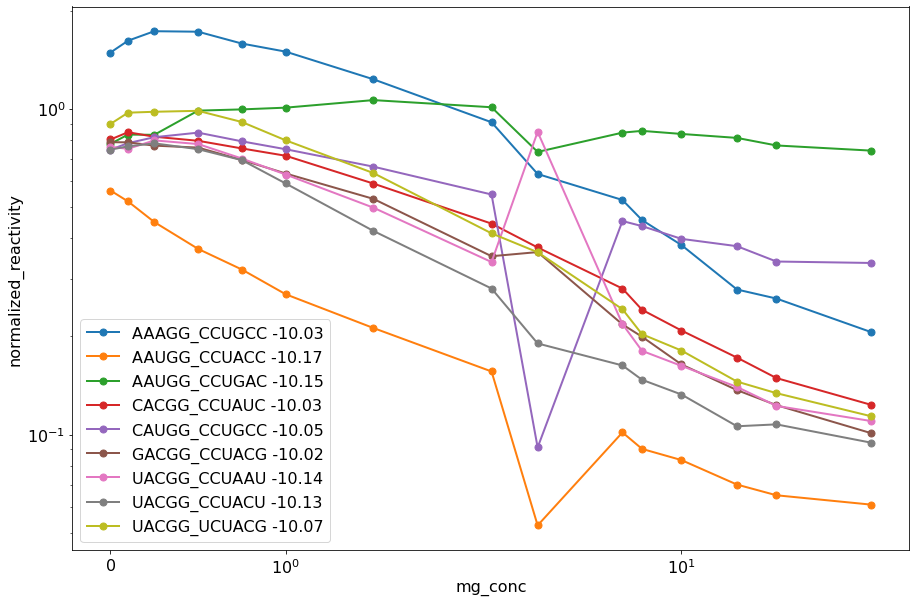

In [74]:
df_sub_2 = df_sub[(df_sub['dg'] < -10.00) & (df_sub['dg'] > -10.20)]
plot_same_tlr_res_against_mg2(df_sub_2, 8)
plt.xscale("symlog")
plt.yscale("log")

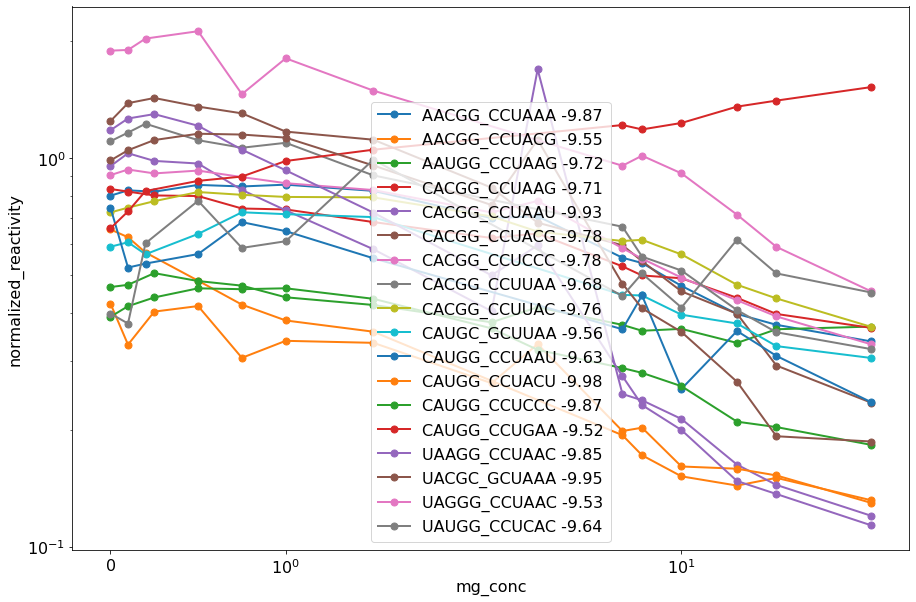

In [75]:
df_sub_2 = df_sub[(df_sub['dg'] < -9.50) & (df_sub['dg'] > -10.00)]
plot_same_tlr_res_against_mg2(df_sub_2, 8)
plt.xscale("symlog")
plt.yscale("log")

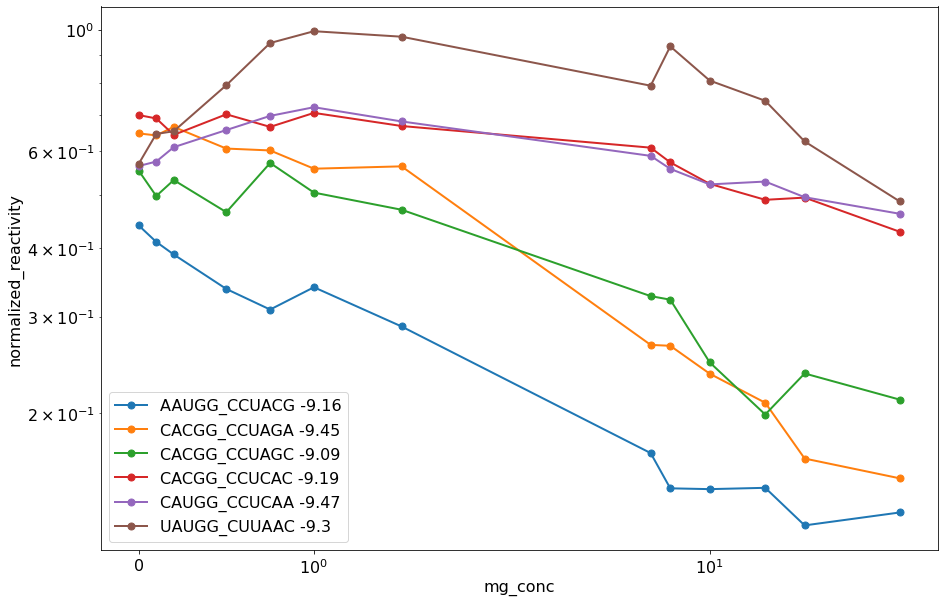

In [76]:
df_sub_2 = df_sub[(df_sub['dg'] < -9.00) & (df_sub['dg'] > -9.50)]
plot_same_tlr_res_against_mg2(df_sub_2, 8)
plt.xscale("symlog")
plt.yscale("log")

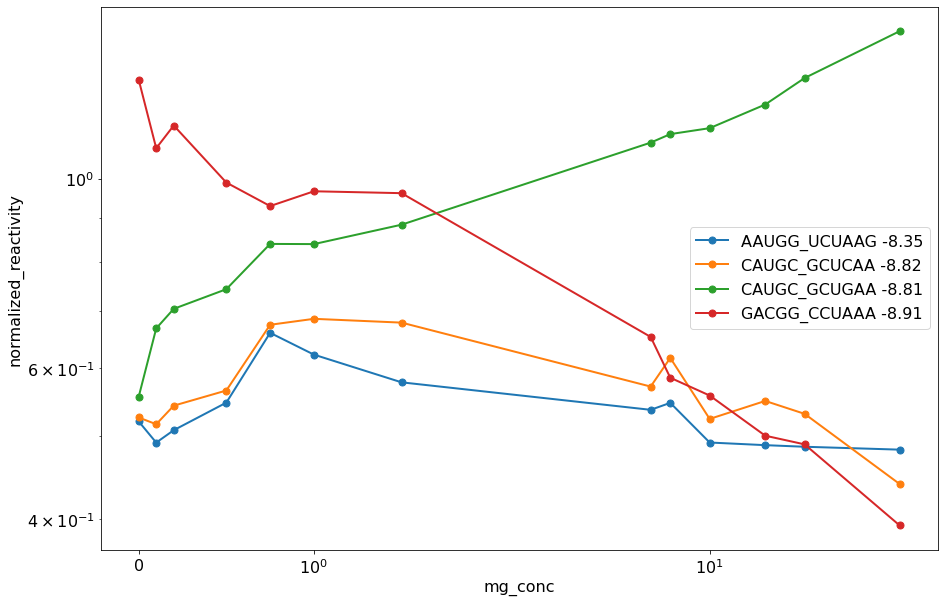

In [77]:
df_sub_2 = df_sub[df_sub['dg'] > -9.00]
plot_same_tlr_res_against_mg2(df_sub_2, 8)
plt.xscale("symlog")
plt.yscale("log")

### A4

In [78]:
q1 = pd.isnull(df["mut_4"]) 
q2 = df["count_ins"] == 0
q3 = df["count_dels"] == 0
q4 = ~(df['mg_conc'] == 5.0) # figure out why this data is messed up??
messed_up = ["CAUGG_CCUAAA", "CAUGA_UCUAAA"]
q5 = ~df['name'].isin(messed_up)
df_sub = df_normed[q1 & q2 & q3 & q4 & q5]

In [79]:
df_sub['name'].unique()

array(['CAUGG_CCUAAU', 'AACGG_CCUACG', 'UAGGG_CCUAAC', 'CACGG_CCUAGA',
       'UAUGG_CUUAAC', 'AAUGG_CCUACG', 'CACGG_CCUAGC', 'GACGG_CCUAAA',
       'AAUGG_UCUAAG', 'CACGG_CCUAAC', 'CAUGG_CCUAAC', 'CAUGC_GCUAAA',
       'CACGG_CCUAAA', 'CAUGG_CCUACA', 'GACGG_CCUAAG', 'CACGG_CCUACC',
       'UAUGG_CCUAAC', 'CAAGG_CCUAAA', 'CACGC_GCUAAA', 'CAUGG_CCUACC',
       'CAGGG_CCUAAA', 'CACGG_CCUACA', 'CAUGC_GCUACA', 'CAGGG_CCUACC',
       'CAUGU_ACUAAA', 'UACGG_CCUAAG', 'UACGG_CCUACG', 'UACGG_CCUAAC',
       'CAAGG_CCUAAC', 'CAGGG_CCUAAC', 'CAAGG_CCUACC', 'UACGG_CCUAAA',
       'CAGGG_CCUACA', 'AAUGG_CCUAAA', 'CAAGC_GCUAAA', 'AAUGG_CCUAAC',
       'CAGGC_GCUAAA', 'GAUGG_CCUAAA', 'UAUGG_CCUACC', 'UACGG_CCUACC',
       'UACGC_GCUACG', 'UAUGG_UCUAAC', 'UACGC_GCUAAG', 'UACGA_UCUAAG',
       'CAUGU_ACUAAC', 'UACGA_UCUACG', 'UACGG_CCUACA', 'UAGGG_CCUACC',
       'AACGG_CCUAAC', 'CAUGG_CCUACU', 'CACGG_CCUAAG', 'AACGG_CCUAAA',
       'UAAGG_CCUAAC', 'AAUGG_CCUACC', 'UACGG_CCUAAU', 'UACGG_CCUACU',
      

In [80]:
df_sub_1 = df_sub[df_sub['dg'] < -11]

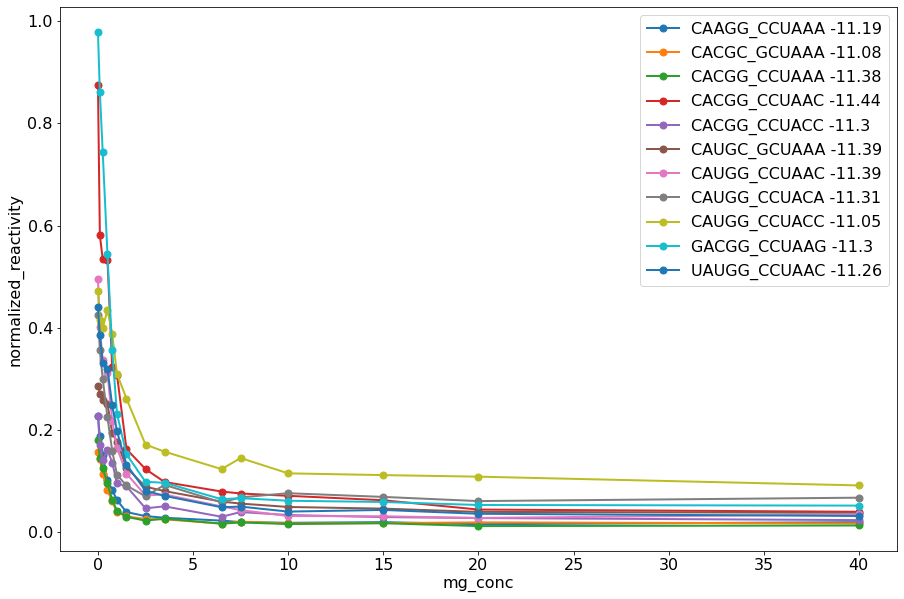

In [81]:
plot_same_tlr_res_against_mg2(df_sub_1, 4)

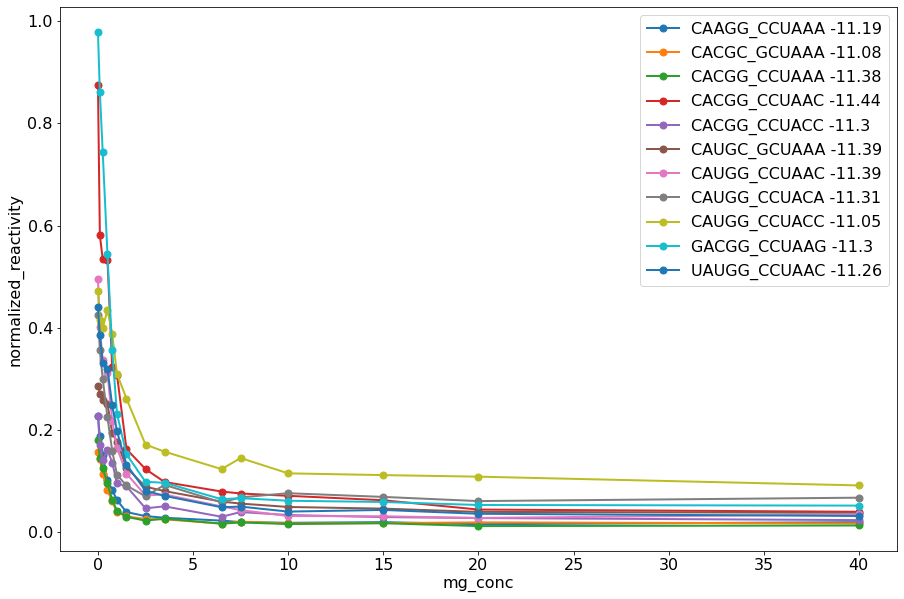

In [82]:
plot_same_tlr_res_against_mg2(df_sub_1, 4)

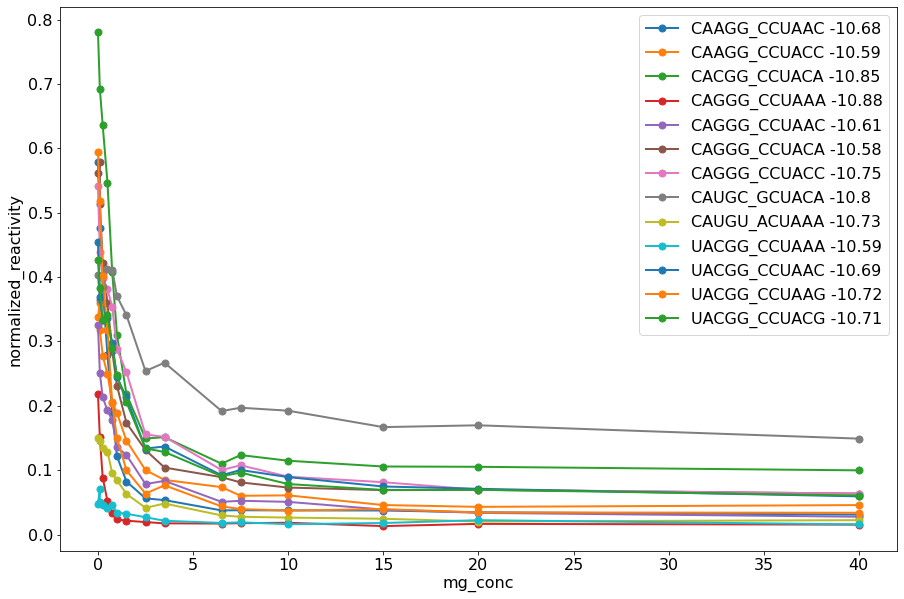

In [87]:
df_sub_2 = df_sub[(df_sub['dg'] < -10.55) & (df_sub['dg'] > -11)]
plot_same_tlr_res_against_mg2(df_sub_2, 4)


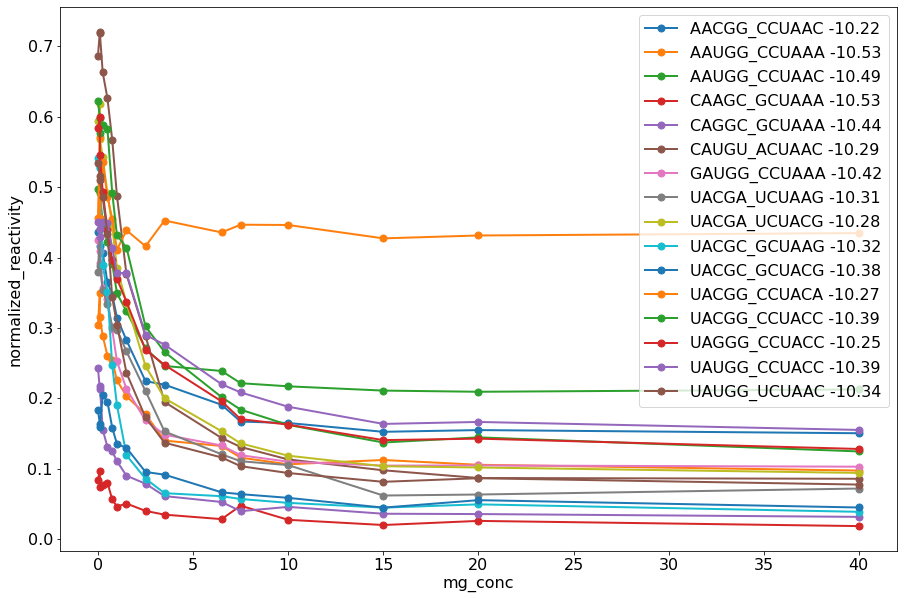

In [88]:
df_sub_2 = df_sub[(df_sub['dg'] < -10.20) & (df_sub['dg'] > -10.55)]
plot_same_tlr_res_against_mg2(df_sub_2, 4)


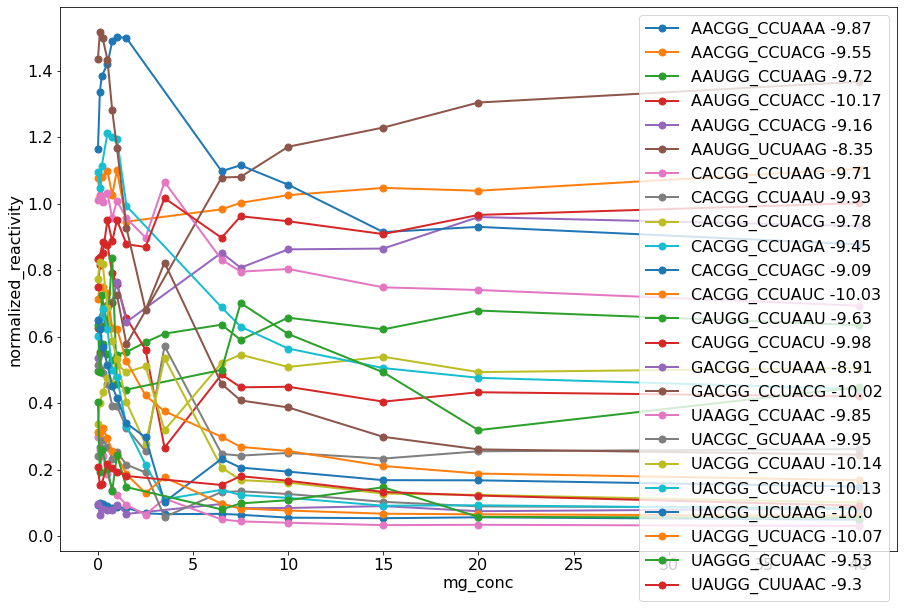

In [89]:
df_sub_2 = df_sub[df_sub['dg'] > -10.20)]
plot_same_tlr_res_against_mg2(df_sub_2, 4)

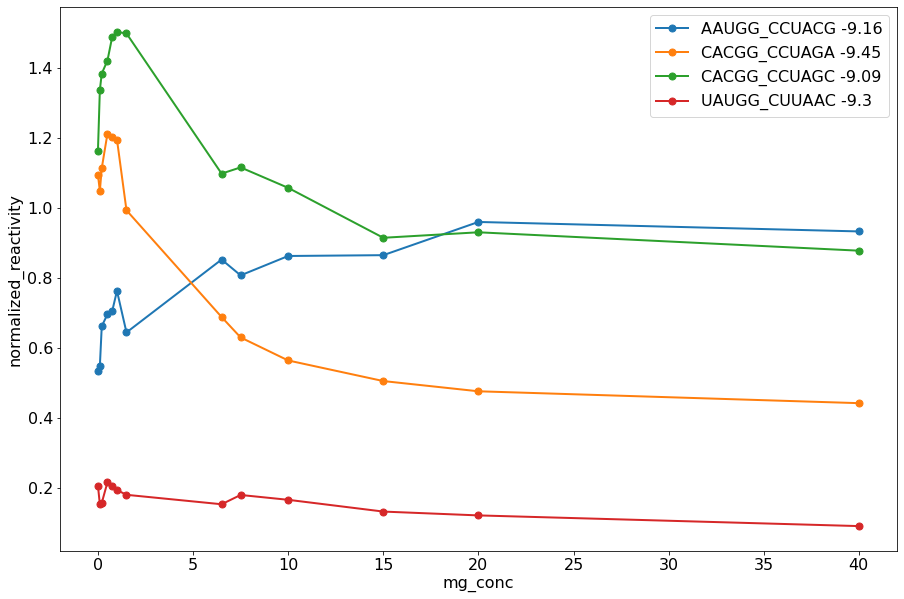

In [91]:
df_sub_2 = df_sub[(df_sub['dg'] < -9.00) & (df_sub['dg'] > -9.50)]
plot_same_tlr_res_against_mg2(df_sub_2, 4)